 <tr>
    <td style='text-align:left;vertical-align:middle;color:#727272;'>
        <h0>
            <font size="7">Modelo Preditivo para Preços de Imóveis</font>
        </h0>
    </td>
</tr>
<tr>
    <td style='text-align:left;vertical-align: middle;'>
        <font size="2">
            <h1>Ensaio na Cidade do Rio de Janeiro</h1>
        </font>
    </td>
</tr>
<tr>
     <td style='text-align:left;vertical-align: middle;'>
        <h4>(Data Science & Machine Leaning with Python)</h4>
    </td>
</tr>
<tr>
    <td style='text-align:left;vertical-align: middle;'>
        <h7>Note: pt-BR, non developers version.</h7><br>
    </td>   
</tr>
<br>
<tr>
    <td>
           <a href="https://www.linkedin.com/in/antonio-r-m-barber%C3%A1-a1a635a6/">
               <img src="https://storage.googleapis.com/kaggle-avatars/thumbnails/1346795-kg.JPG"      
                    style="width:75px;height:75; margin:0px 0px;" />
           </a>
           <font size="2">
                  <p>Antonio Roberto M. Barberá</p>
           </font>
    </td>
 </tr> 
 
<!--
<tr>
    <td style='text-align:left;vertical-align: middle'>
        <a href="https://rbarbera2.wixsite.com/backlog">
            <img src="https://goo.gl/TAHyTu"  style="width:150px;height:40px;margin:0px 0px;"/>                          
        </a>
        <font size="2">
                  <p>Blog</p>
         </font>
    </td>
</tr>
-->

In [63]:
# heating the engines
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib import rcParams
import mpl_toolkits
import math
from math import exp, log, log1p
from random import random
from IPython.display import display
from IPython.display import HTML
import seaborn as sns
%matplotlib inline

## Function to plot y value at the top of the bar
#
def autolabel(rects, ax, cor= 'white', alt=0.90):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height*alt,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=10, color=cor, fontweight='bold' )
# Loads the dataframe
#data = pd.read_csv("../input/model-samples-entry-file/z2017-mod-entrada.csv", delimiter=";", encoding="cp1252", skiprows=1)
data = pd.read_csv("z2017-mod-entrada.csv", delimiter=";", encoding="cp1252", skiprows=1)

## 1. Introdução

A ideia de compor este trabalho teve origem na competição “House Prices: Advanced Regression Techniques”, promovida pelo site Kaggle (https://www.kaggle.com), cujo objetivo é o da predição de preços de casas, tendo como base o banco de dados de residências situadas na região de Ames – estado de Iowa, nos EUA - preços de 2010/11, cujos valores são utilizados para avaliar a acurácia dos modelos propostos pelos competidores. Além disto, as competições do Kaggle visam a fomentar o desenvolvimento de modelos baseados em técnicas de aprendizado de máquinas de última geração.

Este trabalho é o resultado da aplicação prática de algumas destas técnicas, a uma amostra de imóveis situados no Município do Rio deJaneiro - RJ / Brasil.

## 2. Contexto

Muito se comenta a respeito da grande oscilação dos preços dos imóveis na cidade do Rio de Janeiro, a partir de sua escolha como sede da Copa FIFA 2014 e da Olimpíada de 2016. Mas, há décadas, poucos se dedicaram a tentar explicar a formação destes preços, ou a tornar mais transparentes os critérios de avaliação praticados, bem como a relação entre os preços pedidos e características dos imóveis formadores. 

É possível que tal fato se deva aos altos custos envovidos. Uma pesquisa periódica de preços, mesmo que amostral, para que pudesse apresentar granularidade maior, por exemplo, ao nível do tipo do imóvel, bairro e CEP (ou coordenada geográfica), poderia detectar e tentar explicar, as variações de preços observadas, entre as diversas localidades da Cidade do Rio de Janeiro. Aumentar a especificidade da pesquisa, exige maior extratificação de amostras, o que torna as atualizações extremamente caras, pois acabam demandando logística e processos computacionais mais complexos e frequentes.
 
Portanto, este trabalho pretende ser o embrião de um projeto maior, que visa a agregar poderoso conjunto de ferramentas de análise preditiva, ao “canivete suíço” das imobiliárias e dos corretores de imóveis da Cidade do Rio de Janeiro, no sentido de poderem lastrear tecnicamente suas argumentações de venda, a baixo custo, contribuindo para facilitar e aumentar a velocidade das negociações.

Uma versão mais aprimorada dele, poderia mostrar aos analistas e desenvolvedores brasileiros, em Português, que em apenas oito meses, foi possivel obter, por meio de cursos à distância, muita dedicação e boa dose de autodidaxia, uma formação adequada a um cientista de dados iniciante, sem a necessidade de um PhD. É preciso que nossos jóvens, ávidos por ingressarem no mercado de trabalho, saibam disto. 

Aconteceu comigo, há cerca de um ano atrás, aqui no Brasil.

## 3. Justificativa

A ausência de critérios científicos, mais transparentese tecnicamente embasados, juntamente com a escassez de dados atualizados com maior frequência, vem dificultando a prestação de serviços de intermediação, por parte de imobiliárias e corretores, especialmente nos casos em que se observa divergência entre a percepção de preço, pelo cliente, e a avaliação realizada pelo profissional de vendas.  Nestes casos, a imobiliária passa a investir mais do que o necessário em publicidade e divulgação, uma vez que a venda tende a demorar mais do que o previsto. 

Torna-se, portanto, interessante, que se pudese usar de argumentação solidamente fundamentada, no sentido de convencer o cliente a corrigir eventuais inadequações do valor anunciado, sem ferir suscetibilidades. Tudo em prol do aumento da probabilidade de venda, com o menor custo possível.

O tratamento aqui apresentado usa técnicas de engenharia de características (feature engineering) e aprendizado de máquinas (machine learning) que compõem uma significativa parte da emergente área da ciência dos dados, com inteligência artificial.

## 4. Objetivos

O principal objetivo deste trabalho é o de disponibilizar um protótipo funcionante de modelo computacional preditivo dos preços dos imóveis anunciados e situados na Cidade do Rio de Janeiro, fornecidos o número de dormitórios e o bairro que em que se foca a pesquisa. 

O projeto não se prendeu ao uso de um modelo computacional especifico. Foi escolhido o que representou a melhor relação eficência/custo nos testes de bancada, à luz da massa de dados disponível.

Como objetivo secundário, torcemos para que este trabalho sirva como um roteiro didático prático para todos os jovens brasileiros que desejem tornar o Brasil mais competitivo e capaz de tomar melhores decisões, com base no uso de técnicas estatísticas de análise e do uso da inteligência artificial, sobretudo no que tange à implementação de políticas públicas. 

Que ele sirva, também, como inspiração, da mesma forma que diversos trabalhos semelhantes me inspiraram, ao longo de meu mergulho no universo da ciência dos dados. Sou otimista e acredito que só por meio da educação e do conhecimento efetivamente aplicado à pratica, é que conseguiremos transformar verdadeiramente a sociedade brasileira, de forma a torná-la capaz de enfrentar os desafios que nosso país apresenta.



## 5. Definições 
### 5.1.  Fonte dos Dados Trabalhados

Os dados coletados compõem conjunto básico de informações disponibilizadas em portais brasileiros de vendas e aluguéis de imóveis. Trata-se de informação de domínio público, obtida por meio de técnicas de extração (scraping robot), sem a necessidade de criação de credenciais de acesso a estes sites. Por uma questão de compromisso com o princípio da privacidade, opto por não divulgar os nomes destes sites.

A coleta dos dados que compõem nossa ocorreu no período de outubro a dezembro de 2017, perfazendo o total de 1997 imóveis, de 1, 2 e três quartos, localizados nos bairros de Botafogo, Copacabana, Ipanema, Leblon, Gávea, Tijuca e Grajaú.

Nota: o conteúdo aqui apresentado pode ser rapidamente extendido, com pequenas adaptações, para a predição de valores de aluguéis, ou do preço do metro quadrado para aluguéis.

### 5.2.  Modelo Preditivo Baseado em Aprendizado de Máquinas

Nenhum dos conceitos aqui abordados é novidade. O que é realmente novo é nossa atual quase ilimitada
capacidade de processamanento de dados sendo oferecida, a preços acessíveis, a empresas de qualquer porte e até a pessoas físicas.

A modelagem preditiva com aprendizado de máquinas consiste em construir-se um modelo "inteligente" que seja capaz de fazer previsões e de se autoaprimorar, a partir dos dados que o alimentam. Utiliza uma combinação de algoritmos de aprendizado de máquinas (machine learning algorithm) que capta certas propriedades de um conjunto de dados - chamado "conjunto de treinamento" e o utiliza para fazer as predições, que são comparadas e avaliadas frente a com um conjunto de valores reais previamente separado, chamado de "conjunto de teste".

A modelagem preditiva pode ser dividida em duas sub-áreas, a saber: **regressão** e **classificação**. 

Os modelos de regressão baseiam-se na análise das relações entre variáveis e suas tendências. No nosso caso, por se tratar de previsão de preços, o modelo indicado é o de regressão, uma vez que estaremos prevendo quantidades e não probabilidades. 

Como os preços reais são conhecidos, dizemos que nosso modelo será do tipo "supervisionado" e cada resultado intermediário poderá ser comparado com o valor real correspondente (cross validation process), durante o "processo de treinamento" do modelo. 

O modelo base escolhido foi o XGBoost Regressor (maiores detalhes da arquitetura em https://goo.gl/uZ8XCx), uma vez que apresentou maior flexibilidade, robustez e menor custo de implementação. 

O algoritmo usa, internamente, uma expressão matemática com dois termos - o primeiro, é o que procura minimizar as diferenças entre valores previstos e valores reais usando uma função chamada "funcão de perda" (loss function) e o segundo - chamado de "termo de regularização" (regularization term) corrige e controla o erro de precisão do modelo.

Apenas a título de ilustração, as expressões da função objetivo e do termo de regularização do XGBoost são as seguintes, nas quais os literais são reguladores (hiperparâmetros)  do comportamento destas expressões:

$L(\phi)= \sum_i  l(ŷ_i,y_i)+ \sum_k  \Omega (f_k)$

onde $\Omega (f)= \gamma T+ \frac{1}{2} \lambda \|  \omega  \| ^2$     

(vide https://arxiv.org/pdf/1603.02754.pdf)

No nosso caso, a calibragem destes parâmetros se deu com o auxílio dos processos Python GridSearchCV e grid_result, que permitiram uma sucessão de testes assistidos. Nestes testes, enquanto um hiperparâmetro era modificado, os demais eram mantidos fixos e o impacto, nas métricas, era registrado e comparado com o resultado anterior. A composição de cada parâmetro aparece detalhada mais adiante.

Os valores preditos aparecerão expressos em reais (BRL - Brazilian Reals), a valores correntes.

### 5.3.  Variáveis Coletadas (features)

A escolha das variáveis se deu de forma empírica, procurando manter a menor perda possível de informação, durante o processo de coleta (extração). A lista apresentada, a seguir, representa o conjunto das variáveis encontradas nos portais pesquisados. São elas: 

- Identificação do imóvel no portal (id);
- Data da coleta (data);
- Valor da quota condominial (condomínio);
- Número de dormitórios (quartos)
- Número de suítes (suítes);
- Número de vagas de garagem (vagas);
- Área do imóvel (area, em m<sup>2</sup>);
- Nome do Bairro do imóvel (bairro);
- Nome da Rua (rua);
- CEP do imóvel (cep);
- Nome da Cidade (cidade);
- Sigla do estado (uf);
- Sigla do país (pais);
- Latitude (latitude, decimal);
- Longitude (longitude, decimal);
- Descrição do imóvel (descricao);
- Tempo de anúncio (atualizacao, em dias);
- Preço do Imóvel (preco, em BRL);
- Distância do imóvel a um ponto definido (distancia) (*variável construída*);
- Endereço (endereço); e
- Preço do metro quadrado (pm2) (*variável construída*).

### 5.4.  Conceitos
#### 5.4.1.  Variáveis Independentes (features) e Variável Dependente (target)

A variável dependente (aquela que será predita), em princípio, será o preço do imóvel. As demais variáveis são ditas independentes e foram estudadas individualmente, procedendo o que se chama de **análise univariada**. Posteriormente, é feita uma **análise bivariada**, que procura explicar como cada variável se relaciona com o **preço**.

A maioria dos modelos de machine learning é sensível apenas, a variáveis de conteúdo numérico. Portanto, a utilização de variáveis literais como "Descrição do imóvel", cujo conteúdo é extenso e sem padronização, normalmente exige tratamento manual, que torna extremmente oneroso o processo de codificação. Pude visitar alguns dos imóveis constantes da amostra e constatei que as descrições eram "tendenciosamente favoráveis" em 4 dos 5 imóveis visitados. Por isto, optamos por desconsiderá-la, pelo menos, nesta versão do modelo.

As variáveis "Rua", "CEP", "Latitude" e "Longitude", além de terem objetivo e natureza similares - o de expressar a localização do imóvel - apareceram preenchidas com muitas imperfeições, o que sugeriu sua substitução pela variável "distância". Esta variável será descrita mais adiante, na seção que trata da "engenharia de variáveis". A variável "CEP", cuja intuição nos leva a crer que tenha  relevância como variável de agrupamento de preços, será introduzida na próxima versão, uma vez superados os erros mencionados.

As variáveis ditas **independentes** são, portanto, **id, data, tipo, condominio, quartos, suites, vagas, area, bairro, rua, cep, cidade, uf, pais, latitude, longitude, descricao, atualizacao e  distancia**, enquanto que a **variável dependente** (aquela que vai ser predita) será o **preco**.

Por último, o modelo foi adaptado no sentido de fornecer, ao invés da predição do preço, a predição do **preço do metro quadrado (pm2)**. Esta coluna foi criada, pré-calculada e agregada à fonte de dados, durante o processo de extração, uma vez que é uma praxe do mercado imobiliário brasileiro, utilizá-la como referência para composição e comparação de preços.

#### 5.4.2.  Tipos de Variáveis 

Resumidamente, no estudo da Estatísitica, as variáveis podem ser tipificadas da seguinte forma:

- **Variáveis quantitativas**: são características que podem ser medidas em uma escala quantitativa, ou seja, apresentam valores numéricos que fazem sentido. Podem ser **contínuas** ou **discretas**.
  - **Variáveis discretas**: representam características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores e, desta forma, assumem valores inteiros. Geralmente são o resultado de contagens. Ex.: número de filhos, número de cigarros fumados por dia, etc...
  - **Variáveis contínuas**: representam características mensuráveis que assumem valores em uma escala contínua, para as quais valores fracionados fazem sentido. Normalmente são obtidas por meio do uso de algum instrumento. Ex.: peso (balança), altura (trena), tempo (relógio), pressão arterial (manômetro) e por aí vai.
  
- **Variáveis qualitativas (ou categóricas)**: também expressam quantidades mas, diferentemente, são representadas por categorias. Cada categoria descreve uma classificação de indivíduos. Subdividem-se em nominais ou ordinais.
  - **Variáveis qualitativas nominais**: usadas quando não existe ordenação entre as categorias representadas. Ex.: sexo, cor dos olhos, maligno/benigno, etc..
  - **Variáveis ordinais**: usadas quando há a necessidade de ordenação entre as categorias. Ex.: escolaridade (1o, 2o, 3o graus), estágio de doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro,..., dezembro), etc..
  
Nota: todas as variáveis aqui tratadas são do tipo **quantitativa discreta**, à exceção das variáveis **bairro** e **quartos** (e suítes) que são categóricas.

## 6.  Exploração dos Dados

### 6.1.  Variáveis Categóricas do Modelo

Como já foi mencionado, o modelo preditivo trata apenas variáveis numéricas. Portanto, a variável **bairro** teve que ser codificada (encoded) nas sete categorias presentes na amostra, a saber:

- variável **bairro**


1. Botafogo – código: 1
2. Copacabana – código: 2
3. Gávea – código: 3 
4. Grajaú – código: 4
5. Ipanema – código: 5
6. Leblon – código: 6
7. Tijuca - código: 7


- variável **quartos** será usada apenas como variável de agrupamento para a definição do tipo de imóvel alvo da predição, juntamente com a variável **bairro**.

### 6.2.  Exame dos Dados de Entrada do Modelo 

Como a boa prática recomenda, vamos dar uma olhada panorâmica nas variáveis e seus conteúdos, antes de qualquer tratamento ou transformação, iniciando o processo de reconhecimento dos dados:

In [64]:
display(data.head())

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55


Embora não estejam visíveis neste breve resumo das 5 primeiras linhas, a tabulação de todas as ocorrências resultou na seguinte situação:

In [65]:
display(data.describe())

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.000000,1997.00000
mean,971.087631,2.128693,1.039559,1.153230,90.051577,4.023035,55.635954,1.229410e+06,68.447531,13256.74635
std,653.893691,0.793866,0.443091,0.453837,46.417486,2.102215,144.306062,1.155809e+06,82.046778,6977.37614
min,1.000000,1.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.300000e+05,0.030000,2600.00000
25%,550.000000,1.000000,1.000000,1.000000,60.000000,2.000000,0.000000,5.600000e+05,1.330000,7894.74000
50%,800.000000,2.000000,1.000000,1.000000,80.000000,4.000000,0.000000,9.000000e+05,99.000000,11904.76000
75%,1200.000000,3.000000,1.000000,1.000000,110.000000,6.000000,30.000000,1.550000e+06,99.000000,17156.86000
max,7071.000000,3.000000,3.000000,4.000000,475.000000,7.000000,870.000000,1.360000e+07,1334.470000,76666.67000


O quadro acima apresenta medidas da estatística descritiva para cada uma das variáveis extraídas. São elas a quantidade (count), a média (mean), o desvio-padrão (std), valores mínimo (min) e máximo (max) e as marcações dos quartis (25, 50 e 75%). O CEP aparece distorcido e em notação científica, porque foi considerado uma quantidade e não um rótulo qualitativo que expressa uma região.

Notar a ausência da coluna "condominio", que foi importada como do tipo string (cadeia de caracteres), embora estivesse preenchida com números. Para que ela pudesse ser reconhecida no modelo, teve que ser retransformada em numérica (do tipo float), com duas casas decimais.

Do quadro acima, observa-se que há imóveis com zero a 870 dias de tempo de anúncio ("coluna atualização"). O tempo médio do anúncio é de 55.6 dias. O menor preço obtido é de BRL19.970.00 e o maior, de BRL11.500.000.00. A área varia entre 19 a 475m<sup>2</sup>.

Esta breve inspeção já nos mostra algo importante e que pode ter repercussão no custo de implementação e na capacidade de convergência do modelo. Trata-se da diferença de escala entre os valores envolvidos. Ela indica que será necessária alguma transformação nos dados e, eventualmente, proceder-se à sua normalização. Esta foi uma das razões de nossa opção pelo XGBoost (que pode usar internamente uma árvore gradiente - GBTree), que oferece operação robusta, mesmo diante da presença de valores díspares (com alta variância).

Mesmo com grandes volumes de dados, as estimativas que fizemos indicaram que o XGBoost apresentaria performance surpreendente. O ponto de incerteza decorre da complexa calibragem necessária, em face do grande número de parâmetros a serem ajustados. É o preço que se paga pela flexibilidade. Mesmo assim, a performance do modelo compensa a complexidade da sintonia fina (tunning), o que acaba consumindo menos tempo e recursos, sejam eles financeiros, ou computacionais. Se comparado com outros modelos testados, no caso específico da amostra utilizada, o XGBoost se mostrou extremamente rápido, barato e flexível, abreviando principalmente, a quantidade de homens x hora, durane a fase de preparação dos dados.

Nota: na maioria dos projetos de ciência dos dados, são gastos entre 60 e 70% do tempo,  em análise, preparação e engenharia de variáveis.

### 6.3. Engenharia de Variáveis

#### 6.3.1.  A Variável Distância

As inconsistências verificadas nos campos "CEP", "latitude" e "longitude", resultaram na sua desconsideração total, ou parcial, pelo menos nesta versão inicial do modelo. Este fato nos levou a construir a variável provisória **distância**, que tem por objetivo ponderar os preços dos imóveis que se situem próximos a pontos notórios de suas redondezas como, por exemplo, as praias da zona sul do Rio de Janeiro, nos casos em que isto fizesse sentido. Este conceito poderá ser extendido para outros tipos de pontos de referência, como praças, estações do metrô, áreas comerciais famosas e shoppings, nos casos em que os preços apresentem diferenciação correlacionada com a proximidade a estes pontos.

No caso da **distância**, foram computadas as distâncias dos imóveis até pontos uniformente distribuídos na orla marítima das praias de Copacabana (6 pontos), Ipanema (3 pontos), Leblon (3 pontos) e Lagoa Rodrigo de Freitas (6 pontos), sempre tomando-se como resultado a menor das distâncias em km, ou frações, obtidas pela aplicação da função de Vincenty, às coordenadas geográficas recuperadas. 

Nossa customização da função de Vincenty, encontra-se documentada no arquivo **f_dist.py**, localizado na guia "File" deste documento (versão para desenvolvedores), onde pode ser examinado o código Python correspondente. 

Tivemos problemas com imóveis situados em áreas limítrofes, como por exemplo, os da Rua Francisco Otaviano - Ipanema - que, dependendo do número, o imóvel pode ser vinculado às praias de Copacabana ou de Ipanema. Procuramos, sempre, adotar a menor das distâncias.

#### 6.3.2. Variável PM2 (Preço do Metro Quadrado) 

Com o objetivo de desonerar o processo de calibração do modelo, optamos por fazer o cálculo do valor do m<sup>2</sup> no momento da extração, que é um processo lento e demorado pela necessidade de múltiplos acessos http, com temporização. Desta forma evitamos a realização de mais um cálculo concorrente, durante o processo de calibragem e treinamento do modelo.

## 7. Análise de Univariada 

O conjunto de dados, imediatamente após a codificação do campo "bairro", ficou com o seguinte aspecto:

In [66]:
display(data.head())

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55


O pré-cabeçalho revela que trata-se de **1997 linhas**(samples), distribuídas em **9 colunas** (features) e uma décima que contém a variável pm2, alvo (target) da predição. Apenas as 9 colunas que representam as variáveis independentes, farão parte do processo de "aprendizado" do modelo.

Nota: a inserção deste pré-cabeçalho ajudou no dimensionamento prévio dos recursos financeiros e computacionais a serem orçados. No caso de big data (grandes volume de dados) esta infomação, de per si, permite termos uma idéia da ordem de grandeza dos recursos necessários, já na fase inicial de levantamento.

A etapa de codificação da variável "bairro" pode ser acompanhada, no detalhe, lendo-se o arquivo z_prep_model18.py, na guia "File" do presente trabalho (versão para desenvolvedores).

### 7.1. E o que se pode esperar?

Ao longo do exame que faremos das variáveis, nossa intuição poderá ser, ou não, confirmada diante da realidade dos dados. Vamos começar fazendo uma análise univariada, começando pela variável alvo (target) - o **preço**.

#### 7.1.1.  Preço do Imóvel

A variável preço é a razão deste trabalho. Quanto melhor a conhecermos, melhores as chances de entendê-la. A seguir, temos um sumário das estatísticas dos exemplares de preços levantados:

In [67]:
# sumario de estatisiticas descritivas
display(data['preco'].describe().apply(lambda x: format(x, 'f')))

count        1997.000000
mean      1229410.146720
std       1155808.709163
min        130000.000000
25%        560000.000000
50%        900000.000000
75%       1550000.000000
max      13600000.000000
Name: preco, dtype: object

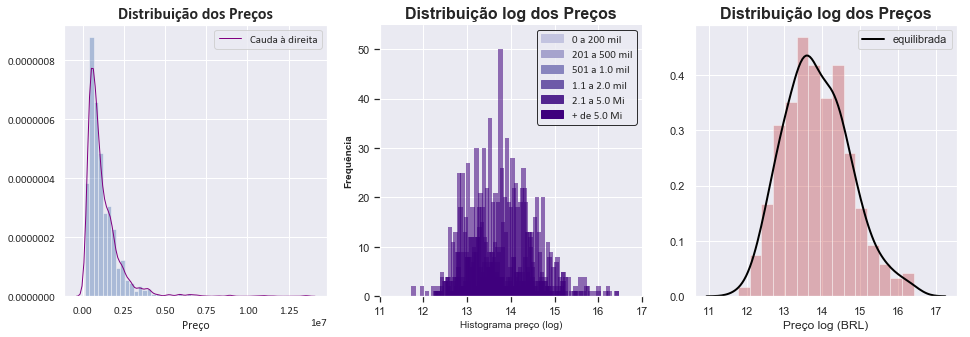

In [68]:
# This piece of code is far from optimized. Please be patient
# data = pd.read_csv("z2017-mod-entrada.csv", delimiter=";", encoding="cp1252", skiprows=1)
#
# Frequency - Preco
fig2 = plt.figure(figsize=(16, 5))
ax = plt.subplot(132)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
# Color patternss
cm = plt.cm.get_cmap("Purples")
# Dataframe
X = data["preco"].value_counts(sort=False).index.tolist()
y = data["preco"].value_counts(sort=False).tolist()
yval = y
xval = np.log1p(X)
tam = len(xval)/10
cor = cm(np.multiply(xval,1/7))
# Axes limits
plt.xlim(11,17)
plt.ylim(0,55)
# Plot 2
matplotlib.rc('font', family='Calibri')
plt.bar(xval, yval, linewidth=0, color=cor, edgecolor='black', alpha=0.55, width=0.1);
plt.title (u'Distribuição log dos Preços', fontsize=16, fontweight='bold')
plt.ylabel(u'Frequência', fontsize=10, fontweight='bold') 
plt.xlabel(u'Histograma preço (log)', fontsize=10)
# 'preco' labels 
sxval = sorted(xval)
# Customize legend colors
num_faixas_leg = 6
cores=[]
cores.append(cm(np.multiply(sxval[2],0.2/7)))
cores.append(cm(np.multiply(sxval[81],0.25/7)))
cores.append(cm(np.multiply(sxval[203],0.3/7)))
cores.append(cm(np.multiply(sxval[304],0.35/7)))
cores.append(cm(np.multiply(sxval[365],0.4/7)))
cores.append(cm(np.multiply(sxval[376],0.45/7)))
# Legend creation
tam = len(cores)
b_patch = []
labels = ['0 a 200 mil', '201 a 500 mil', '501 a 1.0 mil', '1.1 a 2.0 mil', '2.1 a 5.0 Mi', '+ de 5.0 Mi']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch, edgecolor='black')
# Plot 1
ax7 = plt.subplot(131) 
fig2.add_subplot(ax7) 
sns.distplot(data['preco'], axlabel="Preço", kde_kws={"color": "purple", "lw": 1, "label": "Cauda à direita"});
plt.title (u'Distribuição dos Preços', fontsize=16, fontweight='bold')
# Sources and authoring
plt.text(11, -8, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold', clip_on=True)
# Plot 3
sns.set(color_codes=True)
ax7 = plt.subplot(133) 
fig2.add_subplot(ax7) 
colors = plt.cm.plasma(np.log1p(data["preco"].fillna(0).values))
sns.distplot(xval, axlabel="Preço log (BRL)", color="r", kde_kws={"color": "black", "lw": 2, "label": "equilibrada"});
plt.title (u'Distribuição log dos Preços', fontsize=16, fontweight='bold')
# Sources and authoring
plt.text(11, -8, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold', clip_on=True)
plt.show();


O gráfico da esquerda mostra o aspecto da distribuição dos preços. Exibe pico e desvio em relação à distribuição normal, com assimetria positiva acentuada e cauda longa à direita. As medidas de assimetria (skewness) e achatamento (kurtosis) são as seguintes:

In [69]:
# skewness e kurtosis
print(" Assimetria (skewness): %f" % data["preco"].skew())
print("Achatamento (kurtosis): %f" % data["preco"].kurt())

 Assimetria (skewness): 4.201316
Achatamento (kurtosis): 28.803472


Os valores esperados deveriam ficar entre -1.96 e +1.96, bem diferentes dos observados, o que indica a necessidade de correção para evitarmos eventuais problemas na convergência do modelo. Aplicamos, então, a transformação logarítmica log(1+x) à coluna "preco", obtendo uma distribuição bem mais "comportada" e ilustrada no gráfico à direita. Os novos valores para skewness e kurtosis são os seguintes:

In [70]:
# Return the log(1+X) for every cell in the dataset
sk = np.log1p(data["preco"]).skew()
kt = np.log1p(data["preco"]).kurt()
# skewness e kurtosis
print(" Assimetria (skew): "+"{:< 10f}".format(sk))
print("Achatamento (kurt): "+"{:< 10f}".format(kt))

 Assimetria (skew):  0.397956 
Achatamento (kurt):  0.103025 


#### 7.1.2. Condomínio

Nossa intuição indica que a variável valor do "condomínio" possui relevância maior para a decisão de alugar, do que para a de vender/comprar um imóvel. Entretanto, é uma das variáveis mais trabalhadas pelas imobiliárias, uma vez que têm sofrido altos reajustes e, consequentemente, vem ganhando relevância em qualquer tipo de operação com imóveis. Vamos dar uma olhada nas estatísticas descritivas básicas do condominio:

In [71]:
# sumario de estatisiticas descritivas
display(data['condominio'].describe().apply(lambda x: format(x, 'f')))

count    1997.000000
mean      971.087631
std       653.893691
min         1.000000
25%       550.000000
50%       800.000000
75%      1200.000000
max      7071.000000
Name: condominio, dtype: object

O valor mínimo observado - de BRL1.00 - é, provavelmente, um erro de cadastramento. Trata-se de um "outlier" (dado atípico) a ser analisado na distribuição. O fato de ser um único valor, praticamente confirma o fato de ter sido informado acidentalmente. Vamos observar o comportamento do modelo e, mais adiante, tomar a melhor decisão.

A seguir, temos a forma da distribuição da variável "condominio" e o ajuste de log efetuado:

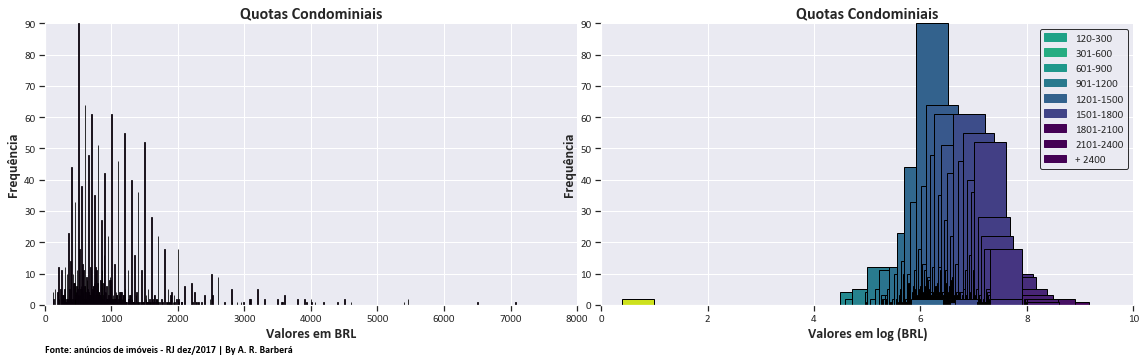

In [72]:
# This piece of code is far from optimized. Please be patient.
# Feature analysis
# Freq - condominio
#
# Graph - 1 No log values (Raw data)
# Define font to the two plots
matplotlib.rc('font', family='Calibri')
#Figure creation
fig = plt.figure(figsize=(16, 5))
ax0 = plt.subplot(121)  
fig.subplots_adjust(hspace=0.5)
fig.add_subplot(ax0)
ax0.spines["top"].set_visible(False)  
ax0.spines["right"].set_visible(False)  
ax0.get_xaxis().tick_bottom()  
ax0.get_yaxis().tick_left()  
cm = plt.cm.get_cmap('viridis_r')
matplotlib.rc('font', family='Calibri')
targ = data["condominio"].value_counts(sort=False)
X = data["condominio"].value_counts(sort=False).index.tolist()
yval = list(targ)
xval= X
plt.xlim(0,8000)
plt.ylim(0,90)
cor = cm(np.multiply(xval,1/9))
# histogram
rects = plt.bar(xval, yval, linewidth=0.8, edgecolor='black', color=cor, alpha=1, width=10);
label = 'Quotas Condominiais'
plt.title (label, fontsize=16, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold') 
plt.xlabel('Valores em BRL', fontsize=14, fontweight='bold')
plt.text(0, -15, "Fonte: anúncios de imóveis - RJ dez/2017 | "  
"By A. R. Barberá", fontsize=10, color='black', fontweight='bold')

# Graph 2 - Log values
plt.tight_layout()
ax1 = plt.subplot(122)  
fig.subplots_adjust(hspace=0.5)
fig.add_subplot(ax1)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
cm = plt.cm.get_cmap('viridis_r')
# Define fonte para todos os gráficoa
matplotlib.rc('font', family='Calibri')
targ = data["condominio"].value_counts(sort=False)
X = np.log1p(data["condominio"].value_counts(sort=False).index.tolist())
yval = list(targ)
xval= X
plt.xlim(0,10)
plt.ylim(0,90)
cor = cm(np.multiply(xval,1/9))
# Histogram
rects = plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=1, width=0.6);
label = 'Quotas Condominiais'
plt.title (label, fontsize=16, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold') 
plt.xlabel('Valores em log (BRL)', fontsize=14, fontweight='bold')
# Legend colors and labels 
cores=[]
cores.append(cm(np.multiply(xval[1],1/18)))
cores.append(cm(np.multiply(xval[14],1/14)))
cores.append(cm(np.multiply(xval[24],1/12)))
cores.append(cm(np.multiply(xval[48],1/10)))
cores.append(cm(np.multiply(xval[92],1/9)))
cores.append(cm(np.multiply(xval[122],1/8)))
cores.append(cm(np.multiply(xval[342],1/7)))
cores.append(cm(np.multiply(xval[381],1/6)))
cores.append(cm(np.multiply(xval[400],1/5)))
tam = len(cores)
b_patch = []
labels = ['120-300', '301-600', '601-900', '901-1200', '1201-1500', '1501-1800', '1801-2100', '2101-2400', '+ 2400']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch, edgecolor='black')

plt.show();

#### 7.1.3. Quartos (nº de dormitórios)

Na massa de dados da amostra, o predomínio é de imóveis com três dormitórios, seguido dos de dois dormitórios e, em quantidade significativamente menor, os de um dormitório. Este fato pode ter origem no critério arbitrário adotado na rotina de extração das informações de atualização, uma vez que o scraper (extrator) navega apenas as dez primeiras páginas dos sites anunciantes, para cada bairro e categoria de imóvel alvo de atualização.

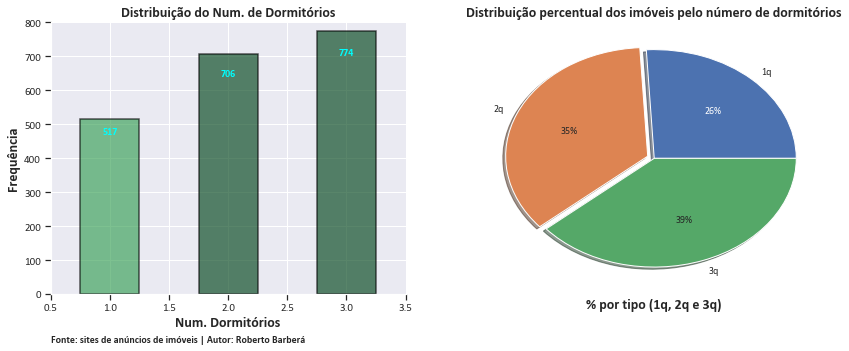

In [73]:
# This piece of code is far from optimized. Please be patient.
#
# This function put the y value at the top-in the bars
#
# Begin graph        
# Fig mount        
fig0 = plt.figure(figsize=(14, 5))        
ax2 = plt.subplot(121)  
fig0.add_subplot(ax2)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left() 
plt.xlim(0.5,3.5)
plt.ylim(0,800)
# Colors 1st graph
cm = plt.cm.get_cmap("Greens")
matplotlib.rc('font', family='Calibri')
targ = data["quartos"].value_counts(sort=False).index.tolist()
val1 = data["quartos"].value_counts(sort=False).tolist()
yval =  val1[:]
xval = [1,2,3]
cor = cm(np.multiply(xval,2/len(xval)))
# Histograma
rects = plt.bar(xval, yval, linewidth=1.5, color=cor, edgecolor='black', alpha=0.65, width=0.5);
# Titulos e fonte
plt.title ('Distribuição do Num. de Dormitórios', fontsize=14, fontweight='bold')
plt.ylabel('Frequência', fontsize=14, fontweight='bold') 
plt.xlabel('Num. Dormitórios', fontsize=14, fontweight='bold')
plt.text(0.5, -140, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold')  
# Destaca valores nas barras
autolabel(rects, ax2, 'cyan',0.9);
#
# Graph 2
ax8 = plt.subplot(122) 
fig0.add_subplot(ax8) 
# Get percents
freqs = data["quartos"].value_counts(sort=False)
tam = len(freqs)
soma = 0
for i in range(tam):
    soma = soma + freqs.iloc[i]
fracs = []    
for i in range(tam):
    frac = (freqs.iloc[i]/soma)*100
    fracs.append(frac)
# Get labels
labels = '1q', '2q', '3q'
explode = (0, 0.05, 0)
# Make square figures and axes
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=True, radius=1.0)
for t in texts:
    t.set_size('small')
for t in autotexts:
#    t.set_size('x-small')
    t.set_size('small')
autotexts[0].set_color('w')
plt.title ('Distribuição percentual dos imóveis pelo número de dormitórios', fontsize=14, fontweight='bold')
plt.xlabel('% por tipo (1q, 2q e 3q)', fontsize=14, fontweight='bold')
plt.show();

Nossa intenção é a de realizar predições de preços para o m<sup>2</sup> de imóveis, a partir do fornecimento do número de dormitórios e do bairro em que se situam. Na próxima versão do indicador, haverá a opção de incluir o CEP como, terceiro parâmetro de entrada. A inclusão do CEP aumenta a especificidade (granularidade) da predição.

Prosseguindo com nosso exame univariado veremos, a seguir, os gráficos das frequências observadas para o número de **suítes**, número de **vagas** de garagem, **área** do imóvel (em m<sup>2</sup>) e **bairro**. O que se espera é que as duas primeiras funcionem como pesos (weights) no modelo, uma vez que possuem pequeno valor absoluto. E o imóvel, ao possuir quantidade superior a 1, de qualquer uma delas, tende a apresentar preço mais alto. Já a **área** espera-se que apresente alta correlação com o **preço**, fato que será examinado na análise bivariada que faremos mais adiante. A variável **bairro** (assim como o CEP) age como qualificador do preço. Eis, a seguir, os gráficos mencionados:

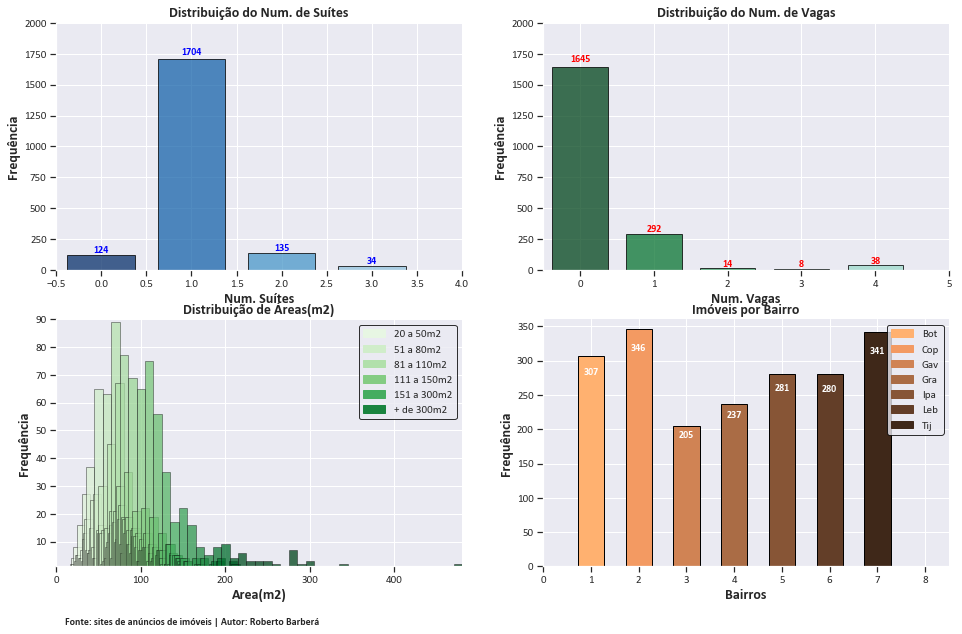

In [74]:
# This piece of code is far from optimized. Please be patient.
#
# >>>>>>>>>>>>>>>>>>>>>>>>>
# Freq. Num de suites
#
# Dimensoes da figura e limites dos eixos
fig = plt.figure(figsize=(16, 10))
#plt.tight_layout()
ax3 = plt.subplot(221) 
fig.add_subplot(ax3) 
ax3.spines["top"].set_visible(False)  
ax3.spines["right"].set_visible(False)  
ax3.get_xaxis().tick_bottom()  
ax3.get_yaxis().tick_left() 
plt.xlim(-0.5, 4);
plt.ylim(0, 2000);
# Define paleta de cores e valores
cm = plt.cm.get_cmap("Blues_r")
targ = data["suites"].value_counts(sort=False).index.tolist()
val1 = data["suites"].value_counts(sort=False).tolist()
yval =  val1[:]
xval = [0,1,2,3]
cor = cm(np.multiply(xval,0.8/len(xval)))
# Plota o histograma
rects = plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=0.75, width=0.75);
plt.title ('Distribuição do Num. de Suítes', fontsize=14, fontweight='bold');
plt.ylabel('Frequência', fontsize=14, fontweight='bold');
plt.xlabel('Num. Suítes', fontsize=14, fontweight='bold');
# Identifica a fontes dos dados e autoria
# plt.text(-0.5, -200, "Fonte: sites de anúncios de imóveis | "  
#        "Autor: Roberto Barberá", fontsize=10, fontweight='bold')  
# Destaca  valores nas barras
autolabel(rects, ax3, 'blue', 1.015)
# -------------------> plt.show()

# Freq - Num. de vagas
#
# Dimensoes da figura e limites dos eixos
# plt.figure(figsize=(12, 9))
ax4 = plt.subplot(222)  
fig.add_subplot(ax4)
ax4.spines["top"].set_visible(False)  
ax4.spines["right"].set_visible(False)  
ax4.get_xaxis().tick_bottom()  
ax4.get_yaxis().tick_left() 
plt.xlim(-0.5, 5);
plt.ylim(0, 2000);
# Define paleta de cores e valores
cm = plt.cm.get_cmap("BuGn_r")
targ = data["vagas"].value_counts(sort=False).index.tolist()
val1 = data["vagas"].value_counts(sort=False).tolist()
yval =  val1[:]
xval = [0,1,2,3,4]
cor = cm(np.multiply(xval,0.8/len(xval)))
# Plota o histograma
rects = plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=0.75, width=0.75);
plt.title ('Distribuição do Num. de Vagas', fontsize=14, fontweight='bold');
plt.ylabel('Frequência', fontsize=14, fontweight='bold');
plt.xlabel('Num. Vagas', fontsize=14, fontweight='bold');
# plt.text(-0.5, -200, "Fonte: sites de anúncios de imóveis | "  
#        "Autor: Roberto Barberá", fontsize=10, fontweight='bold')  
# Destaca  valores nas barras
autolabel(rects, ax4, 'red', 1.015) # loaded on initialization

# Freq - Area
#
# Figure dimensions and axes limits
#plt.figure(figsize=(12, 9))
ax5 = plt.subplot(223) 
fig.add_subplot(ax5) 
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)  
ax5.get_xaxis().tick_bottom()  
ax5.get_yaxis().tick_left()  
plt.xlim(0,480);
plt.ylim(1,90);
# Define color palette
cm = plt.cm.get_cmap("Greens")
targ = data["area"].value_counts(sort=False).index.tolist()
val1 = data["area"].value_counts(sort=False).tolist()
yval = val1
xval = targ
cor = cm(np.multiply(xval,0.8/len(xval)))
# Plots hist
rects = plt.bar(xval, yval, linewidth=0.5, color=cor, edgecolor='black', alpha=0.75, width=10);
# Define tititles and authoring
plt.title ('Distribuição de Áreas(m2)', fontsize=14, fontweight='bold');
plt.ylabel('Frequência', fontsize=14, fontweight='bold');
plt.xlabel('Area(m2)', fontsize=14, fontweight='bold');
plt.text(10, -20, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold');
# Legendas de Preços
sxval = sorted(xval)
# Pega a cor da 1a. faixa
cores=[]
cores.append(cm(np.multiply(sxval[0],1/170)))
cores.append(cm(np.multiply(sxval[30],1/240)))
cores.append(cm(np.multiply(sxval[60],1/250)))
cores.append(cm(np.multiply(sxval[93],1/250)))
cores.append(cm(np.multiply(sxval[130],1/250)))
cores.append(cm(np.multiply(sxval[180],1/450)))
# Cria a legenda   
tam = len(cores)
b_patch = []
labels = ['20 a 50m2', '51 a 80m2', '81 a 110m2','111 a 150m2', '151 a 300m2', '+ de 300m2']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch, edgecolor='black')

#-----------------------------------------------> plt.show()
# Freq - Bairro
#
# Figure dimensions and axes limits
# plt.figure(figsize=(10, 7.5))
# plt.figure(figsize=(12, 8))
ax6 = plt.subplot(224) 
fig.add_subplot(ax6) 
ax6.spines["top"].set_visible(False)  
ax6.spines["right"].set_visible(False)  
ax6.get_xaxis().tick_bottom()  
ax6.get_yaxis().tick_left()  
# Color settings and Data
cm = plt.cm.get_cmap("copper_r")
targ = data["bairro"].value_counts(sort=False).index.tolist()
val1 = data["bairro"].value_counts(sort=False).tolist()
yval =  val1[:]
xval = targ[:]
# Axes limits 
plt.xlim(0,8.5);
plt.ylim(0,360);
cor = cm(np.multiply(xval,0.8/len(xval)))
# Bar chart
rects = plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=1, width=0.55);
plt.title ('Imóveis por Bairro', fontsize=14, fontweight='bold');
plt.ylabel('Frequência', fontsize=14, fontweight='bold');
plt.xlabel('Bairros', fontsize=14, fontweight='bold');
# Legends for places (in Brasil we don't have counties)
cores=[]
for i in xval:
    cores.append(cm(np.multiply(i,0.8/len(xval))))
tam = len(cores)
b_patch = []
labels = ['Bot', 'Cop', 'Gav', 'Gra', 'Ipa', 'Leb', 'Tij']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
# Legends constructor and authoring
plt.legend(handles=b_patch, edgecolor='black')
#
# Plot height values inside and at the top of the bars, with diferent colors and an offset multiplier. 
# Usage: autolabel(rects,color,offset) // default color='white' and default offset=0.90
autolabel(rects,ax6,'white',0.90)
plt.show();

A variável **área**, a exemplo do **preço**, também apresenta assimetria com cauda à direita (right-tailed) e necessita de ajustamento. Procedemos, então, à sua logaritmação de maneira análoga à utilizada no ajuste do **preço**. A representação da **área**, após a transformação, aparece logo abaixo:

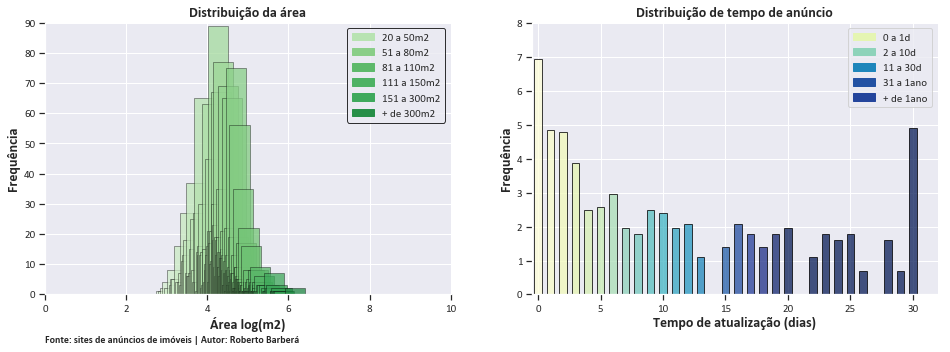

In [75]:
# This piece of code is far from optimized. Please be patient.
#
# Freq - Area
# Fig dim and axes limits
fig = plt.figure(figsize=(16, 5))
plt.tight_layout()
ax5 = plt.subplot(121) 
fig.add_subplot(ax5) 
ax5.spines["top"].set_visible(False)  
ax5.spines["right"].set_visible(False)  
ax5.get_xaxis().tick_bottom()  
ax5.get_yaxis().tick_left()  
plt.xlim(0,10);
plt.ylim(0,90);
# Define color palette and values
cm = plt.cm.get_cmap("Greens")
targ = data["area"].value_counts(sort=False).index.tolist()
val1 = data["area"].value_counts(sort=False).tolist()
yval = val1
xval = np.log1p(targ)
cor = cm(np.multiply(np.square(xval),1/50))
# Plot
rects = plt.bar(xval, yval, linewidth=0.5, color=cor, edgecolor='black', alpha=0.75, width=0.5);
# Define titles, fonts and authoring
plt.title ('Distribuição da área', fontsize=14, fontweight='bold');
plt.ylabel('Frequência', fontsize=14, fontweight='bold');
plt.xlabel('Área log(m2)', fontsize=14, fontweight='bold');
plt.text(0, -16, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold');
# Legends
sxval = sorted(xval)
# Get color
cores=[]
cores.append(cm(np.multiply(sxval[0],1/10)))
cores.append(cm(np.multiply(sxval[30],1/9)))
cores.append(cm(np.multiply(sxval[60],1/8)))
cores.append(cm(np.multiply(sxval[93],1/8)))
cores.append(cm(np.multiply(sxval[130],1/8)))
cores.append(cm(np.multiply(sxval[180],1/8)))
# Create legend labels   
tam = len(cores)
b_patch = []
labels = ['20 a 50m2', '51 a 80m2', '81 a 110m2','111 a 150m2', '151 a 300m2', '+ de 300m2']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch, edgecolor='black')
#
# Freq - Time of selling anounce (Atualizacao)
#
ax = plt.subplot(122)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
# Padroes do grafico
cm = plt.cm.get_cmap("YlGnBu")
targ = data["atualizacao"].value_counts(sort=False).index.tolist()
val1 = data["atualizacao"].value_counts(sort=False).tolist()
yval = np.log1p(val1)
xval = np.log1p(targ)
xval = targ
cor = cm(np.multiply(xval,1/20))
# Limites dos eixos
plt.xlim(-0.5,32)
plt.ylim(0,8)
# Grafico de barras
matplotlib.rc('font', family='Calibri')
plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=0.75, width=0.6)
plt.title (u'Distribuição de tempo de anúncio', fontsize=14, fontweight='bold')
plt.ylabel(u'Frequência', fontsize=14, fontweight='bold') 
plt.xlabel(u'Tempo de atualização (dias)', fontsize=14, fontweight='bold')
# Legend labels
cores=[]
cores.append(cm(np.multiply(sxval[2],0.05)))
cores.append(cm(np.multiply(sxval[11],1/10)))
cores.append(cm(np.multiply(sxval[27],1/6)))
cores.append(cm(np.multiply(sxval[28],1/5)))
cores.append(cm(np.multiply(sxval[39],1/5)))
sxval = sorted(xval)
# Created legend
tam = len(cores)
b_patch = []
labels = ['0 a 1d', '2 a 10d', '11 a 30d', '31 a 1ano', '+ de 1ano']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch)
plt.show();

In [76]:
# skewness e kurtosis
print(" Assimetria (skewness): %f" % np.log1p(data["area"]).skew())
print("Achatamento (kurtosis): %f" % np.log1p(data["area"]).kurt())

 Assimetria (skewness): 0.053244
Achatamento (kurtosis): 0.388517


No gráfico acima e à direita, temos a variável tempo de **atualização** (ou dias de anúncio). Em se tratando de preço de venda, ela tende a ser acessória e se presta, primordialmente, ao cálculo e à apropriação do custo de divulgação a ser recuperado pela imobiliária anunciante, no momento da efetivação da venda (ou do aluguel) do imóvel. O que se pode esperar desta variável é uma indicação de que quanto maior o número de dias de **atualização** (anúncio), mais alto (e fora de mercado) deveria ser o preço esperado.

No gráfico, a seguir, temos a **distância**:

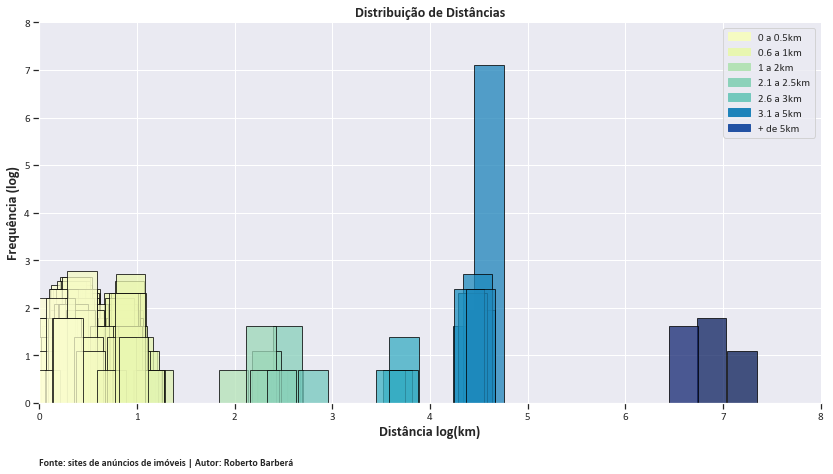

In [77]:
# Freq - Distância
#
# Dimensões da figura e limites do gráfico
fig = plt.figure(figsize=(14,7))
ax = plt.subplot(111)
fig.add_subplot(ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
# Padroes do grafico
cm = plt.cm.get_cmap("YlGnBu")
targ = data["distancia"].value_counts(sort=False).index.tolist()
val1 = data["distancia"].value_counts(sort=False).tolist()
yval = np.log1p(val1)
xval = np.log1p(targ)
cor = cm(np.multiply(xval,1/7))
# Limites dos eixos
plt.xlim(0,8)
plt.ylim(0,8)
# Grafico de barras
matplotlib.rc('font', family='Calibri')
plt.bar(xval, yval, linewidth=1, color=cor, edgecolor='black', alpha=0.75, width=0.3)
plt.title (u'Distribuição de Distâncias', fontsize=14, fontweight='bold')
plt.ylabel(u'Frequência (log)', fontsize=14, fontweight='bold') 
plt.xlabel(u'Distância log(km)', fontsize=14, fontweight='bold')
plt.text(0, -1.3, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold');
# Legendas de Preços
sxval = sorted(xval)
num_faixas_leg = 7
# Cores da legenda (tentativa e erro)
cores=[]
cores.append(cm(np.multiply(sxval[58],1/7)))
cores.append(cm(np.multiply(sxval[137],1/7)))
cores.append(cm(np.multiply(sxval[154],1/7)))
cores.append(cm(np.multiply(sxval[160],1/7)))
cores.append(cm(np.multiply(sxval[164],1/7)))
cores.append(cm(np.multiply(sxval[175],1/7)))
cores.append(cm(np.multiply(sxval[178],1/9.2)))
# Cria a legenda   
tam = len(cores)
b_patch = []
labels = ['0 a 0.5km', '0.6 a 1km', '1 a 2km','2.1 a 2.5km','2.6 a 3km', '3.1 a 5km', '+ de 5km']
for j in range(tam):
    b_patch.append(mpatches.Patch(color=cores[j], label=labels[j]))
plt.legend(handles=b_patch)
plt.show();

Os bairros de Botafogo, Gávea, Tijuca e Grajaú tiveram suas distâncias às praias e à Lagoa Rodrigo de Freitas, desconsideradas. Apenas os bairros de Copacabana, Ipanema (que engloba Lagoa) e Leblon tiveram as distâncias calculadas. Atenção especial teve que ser dada à função de Vincenty, uma vez que as coordenadas geográficas coletadas na amostra, nem sempre apresentavam valores coerentes com a bairro e endereço associados ao imóvel. Estes casos foram desconsiderados. 

## 8. Análise Bivariada

A partir deste ponto iniciaremos a inspeção da relação de cada variável independente, com o preço. Isto nos ajudará a visualizar cada relação e a reunir subsídios, para a escolha do modelo base. 

### 8.1.  Análise da área vs preço

A intuição indica que a tendência deve ser de quanto maior a área, maior o preço.

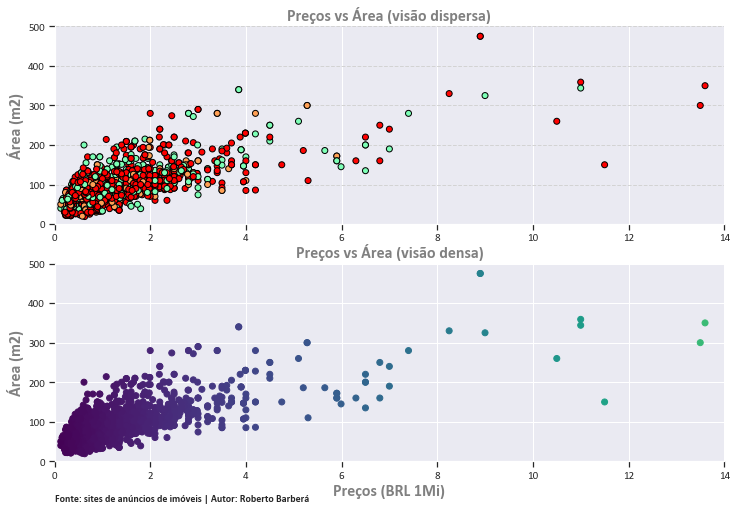

In [78]:
fig = plt.figure(figsize=(12, 8))
plt.tight_layout()
ax = plt.subplot(211) 
ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
# Limites
plt.xlim(0,14)
plt.ylim(0,500)
# for ax in fig.axes:
#   ax.grid(True)
# Padrão de cores
#cm = plt.cm.get_cmap("inferno_r")
cm = plt.cm.get_cmap("rainbow")
#cm = plt.cm.get_cmap("RdYlGn_r")
xval = np.multiply(data.preco,1/1000000)
cor = cm(np.multiply(yval,5/7))
plt.scatter(xval, data.area, facecolor=cor, edgecolor='black')
plt.title (u'Preços vs Área (visão dispersa)', fontsize=16, fontweight='bold', color='gray')
plt.ylabel(u'Área (m2)', fontsize=16, fontweight='bold', color='gray') 
# plt.xlabel(u'Dispersão em cores (R$1Mi)', fontsize=16, fontweight='bold')
# plt.text(-0.5, -55, "Fonte: sites de anúncios de imóveis | "  
#        "Autor: Roberto Barberá", fontsize=10, fontweight='bold')
#
# Adiciona segundo grafico à figura
ax1 = plt.subplot(212)
fig.add_subplot(ax1)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left() 
# Redefine limites dos eixos
plt.xlim(0,14)
plt.ylim(0,500)
cm = plt.cm.get_cmap("viridis")
cor = cm(np.multiply(xval,1/20))
# Padroes de cores (usadas cores sólidas)
plt.scatter(np.multiply(data.preco,1/1000000), data.area, facecolor=cor)
plt.title (u'Preços vs Área (visão densa)', fontsize=16, fontweight='bold', color='gray')
plt.ylabel(u'Área (m2)', fontsize=16, fontweight='bold', color='gray') 
# ax1.xaxis.set_label_coords(12, -55)
plt.xlabel(u'Preços (BRL 1Mi)', fontsize=16, fontweight='bold', color='gray')
plt.text(0, -100, "Fonte: sites de anúncios de imóveis | Autor: Roberto Barberá", fontsize=10, fontweight='bold')
plt.show();

Os gráficos acima mostram que realmente há correlação direta entre área e preço. Existem, inclusive, chances de que esta relação possa ser linearizável.

### 8.2.  Análise da área vs pm2 (preço do m<sup>2</sup>)

Em última análise, a variável **pm2** possui a mesma natureza da variável **preço**, com a vantagem de permitir comparações entre imóveis de tipos diferentes e localidades diferentes. O **pm2** deverá ser preferido como estimador no lugar do preço, em função da sua ampla utilização pelo mercado. Os gráficos acima mostram como o preço do m<sup>2</sup>, também varia na razão direta da área, quando considerado alvo da predição. Neste caso, as variáveis **preço** e **área** teriam que ser excluídas do processo de aprendizado do modelo preditivo, uma vez que o **pm2** nada mais é, do que a razão entre as ambas.

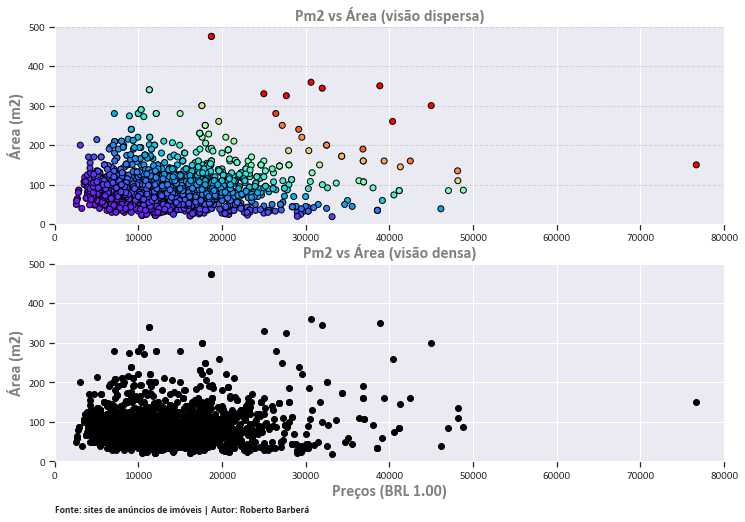

In [79]:
# Pr. M2 vs area >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# PM2 vs area
#
fig = plt.figure(figsize=(12, 8))
plt.rc('axes', axisbelow=True)
ax = plt.subplot(211)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
#
plt.xlim(0,80000)
plt.ylim(0,500)
cm = plt.cm.get_cmap("rainbow")
cor = cm(np.multiply(xval,1/8))
#
plt.scatter(np.multiply(data.pm2,1), data.area, facecolor=cor, edgecolor='black')
plt.title (u'Pm2 vs Área (visão dispersa)', fontsize=16, fontweight='bold', color='gray')
plt.ylabel(u'Área (m2)', fontsize=16, fontweight='bold', color='gray') 
#
# Adds second plot to fig
ax1 = plt.subplot(212)
fig.add_subplot(ax1)
# ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left() 
plt.xlim(0,80000)
plt.ylim(0,500)
plt.scatter(np.multiply(data.pm2,1), data.area, facecolor='black')
plt.title (u'Pm2 vs Área (visão densa)', fontsize=16, fontweight='bold', color='gray')
plt.ylabel(u'Área (m2)', fontsize=16, fontweight='bold', color='gray') 
plt.xlabel(u'Preços (BRL 1.00)', fontsize=16, fontweight='bold', color='gray')
plt.text(0, -130, "Fonte: sites de anúncios de imóveis | "  
         "Autor: Roberto Barberá", fontsize=10, fontweight='bold')
plt.show();

No caso do **pm2**, a **área** aparece no denominador e neutraliza a inclinação positiva observada nos gráficos do **preço**. As plotagens apresentam uma quase "horizontalização" da tendência, antes visualmente positiva para o **preco**.

### 8.3.  Análise da relação (área/distância) vs preço

Ao criarmos a variável **distância**, nossa intenção era a de aproveitar os dados de geolocalização, constantes da amostra, para que o modelo pudesse "aprender" a considerar o fator de "proximidade das orlas", como diferenciador do preço. Embora as coordenadas geográficas tenham apresentado defeitos de preenchimento, conseguimos recompor parte delas, mais especificamente, aquelas relativas aos imóveis situados nos bairros de Copacabana, Ipanema e Leblon.

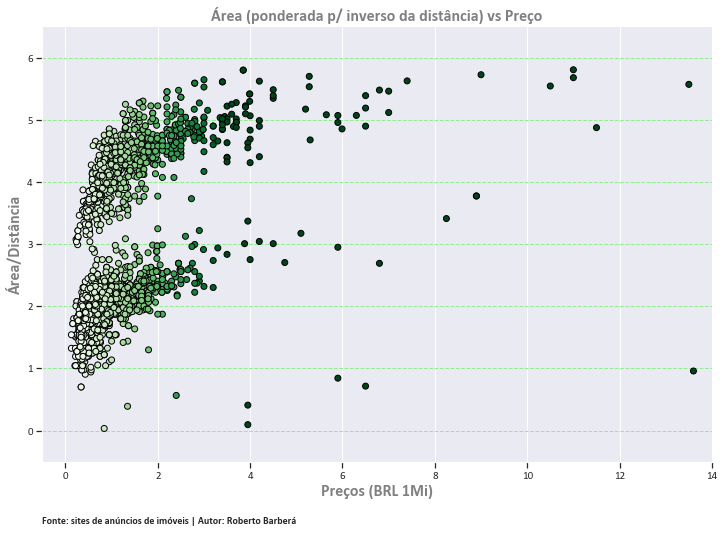

In [80]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Área/Distância vs Preço
# 
#
fig = plt.figure(figsize=(12, 8))
plt.rc('axes', axisbelow=True)
ax1 = plt.subplot(111)
ax1.yaxis.grid(color='lightgreen', linestyle='dashed')
cm = plt.cm.get_cmap("Greens")
fig.add_subplot(ax1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left() 
# Redefine limites dos eixos
plt.xlim(-0.5,14)
plt.ylim(-0.5,6.5)
# Padroes de cores (usadas cores sólidas)
xval = np.multiply(data.preco,1/1000000)
yval = np.add(np.log1p(data.area), -np.log1p(np.multiply(data.distancia,1/10)))
cor = cm(np.multiply(xval,2/7))
plt.scatter(xval,yval, facecolor=cor, edgecolor='black')
# Titulos  e labels
plt.title (u'Área (ponderada p/ inverso da distância) vs Preço', fontsize=16, fontweight='bold', color='gray')
plt.ylabel(u'Área/Distância', fontsize=16, fontweight='bold', color='gray') 
plt.xlabel(u'Preços (BRL 1Mi)', fontsize=16, fontweight='bold', color='gray')
# Fonte, creditos e autoria
plt.text(-0.5, -1.5, "Fonte: sites de anúncios de imóveis | "  
"Autor: Roberto Barberá", fontsize=10, fontweight='bold')
plt.show();

À medida em que a distância aumenta, a relação área/distância diminui, denotando efeito de correlação inversa, que é o que esperamos constatar nas matrizes de correlação que montaremos e analisaremos a seguir:

### 8.4. Matrizes de Correlação

#### 8.4.1. Matriz Geral de Correlação
Até aqui permanecemos seguindo nossa intuição. Entretanto, o trabalho de engenharia na ciência de dados, deve envidar os maiores esforços no sentido de fornecer análise objetiva e isto passa pelo exame da correlação entre as variáveis estudadas.

Neste sentido, não é por acaso que a matriz de correlação é a forma mais indicada e utilizada, quando se deseja obter uma panorâmica das relações entre as variáveis de um modelo. Os atuais recursos computacionais, juntamente com Python e suas eficientes bibliotecas especializadas, facilitam a vida do cientista de dados, encurtando o tempo de análise, processamento e produzindo visualizações sofisticadas, tais como as que veremos a seguir.

Os coeficientes variam no intervalo (fechado) entre **[-1, 1]**. Valores negativos (tons claros) denotam correlação inversa e os positivos (tons escuros), a correlação direta. Valores próximos de zero denotam correlação neutra (ou que não há correlação).

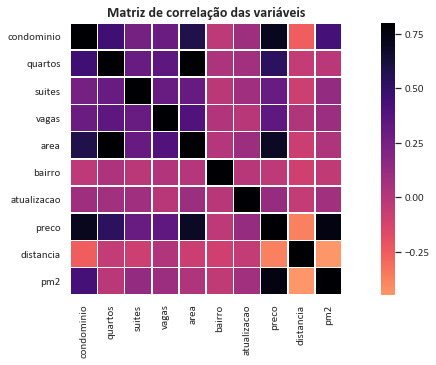

In [81]:
# Return the log(1+X) for every cell in the dataset
logdata = data.applymap(np.log1p)
corrmat = logdata.corr()
f, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="magma_r", linewidths=.5, center=0);
label = 'Matriz de correlação das variáveis'
plt.title (label, fontsize=14, fontweight='bold')
plt.show();

A matriz mostra, dentre outras relações, que a **distância** tem correlação negativa (-0.6) com o **preço** e com o **pm2**.

Mostra, igualmente, correlações fortemente positivas: condominio e preço, condomínio e área, número de quartos e preço, área e preço. 

A **correlação neutra entre bairro e preço** observada na matriz, não surpreende, uma vez que o valor detectado para o bairro, embora seja um valor numérico, é o código do bairro e não um peso capaz de modificar significativamente o preço do imóvel, como sabemos que a localização o faz.  Se lembrarmos das definições iniciais, a variável **bairro** expressa uma categoria criada para podermos agrupar os imóveis, por bairro, na hora de efetuarmos as predições. 

Portanto, quando formos utilizar o modelo preditivo, será fornecido a ele o bairro como um dado de entrada. Desta forma, o algoritmo selecionará apenas imóveis do bairro indicado, segmentando o "conjunto de treinamento" apenas com imóveis do bairro alvo da predição.

#### 8.4.2. Matrizes de Correlação do Preço e do PM2

Para pormenorizarmos o estudo de nossa variável alvo - **preço** - optamos por usar a matriz de correlação que apresenta os coeficientes de correlação em ordem decrescente de valor, em relação à variável preço (zoomed matrix). É como se estivéssemos destacando as relações do preço, com as demais variáveis.

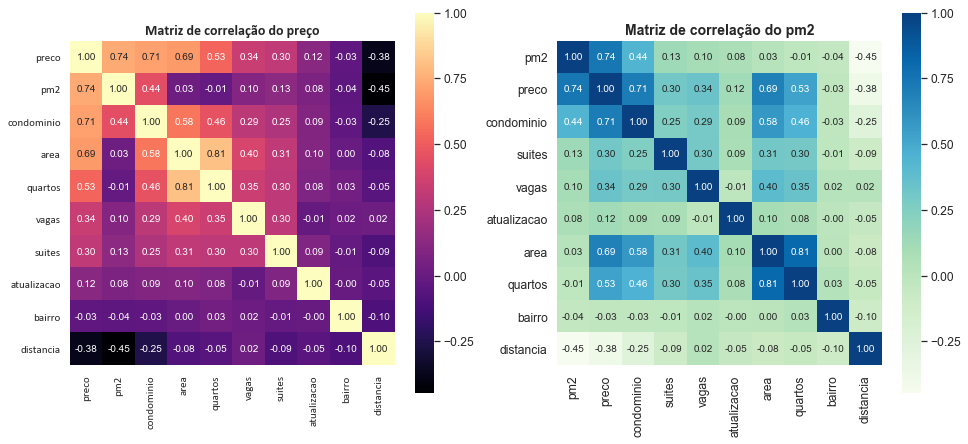

In [82]:
# preco correlation matrix
# 1st graph
fig = plt.figure(figsize=(16, 7))
plt.tight_layout()
ax = plt.subplot(121) 
fig.add_subplot(ax)
k = 10 # number of variables for heatmap (here all)
logdata = data.applymap(np.log1p)
corrmat = logdata.corr()
cols = corrmat.nlargest(k, 'preco')['preco'].index
cm = np.corrcoef(logdata[cols].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap="magma", annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
label = 'Matriz de correlação do preço'
plt.title (label, fontsize=14, fontweight='bold')
# 2nd graph
ax1 = plt.subplot(122) 
fig.add_subplot(ax1)
k = 10 # number of variables for heatmap (here all)
cols = corrmat.nlargest(k, 'pm2')['pm2'].index
cm = np.corrcoef(logdata[cols].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap="GnBu", annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
label = 'Matriz de correlação do pm2'
plt.title (label, fontsize=14, fontweight='bold')
plt.show();

O mapa demonstra que as variáveis **condomínio(R=0.74)**, **área(R=0.71)** e número de dormitórios (**quartos, R=0.69**) são as que mais se correlacionam positivamente com o preço, enquanto  **distância (R=-0,38)** é a que mais se relaciona negativamente. No caso da variável distância ocorre, justamente, o que havíamos planejado ao construí-la. 

O quadrado mais claro, ao centro (e um pouco acima) na diagonal da matriz de correlação de preços, mostra forte correlação positiva entre o número de quartos e a área do imóvel, pelo menos dentre os 1997 imóveis que compõem a amostra em estudo.

A seguir,  é exibida representação visual, em scatter plots (plotagem esparsa), primeiro para a variável **preço** e depois para a variável **pm2**,  mostrando os respectivos relacionamentos com as variáveis **condominio **, **area** e **vagas**,  decompostas em cores que representam a quantidade de dormitórios (**1q** em azul, **2q** em verde e **3q** em vermelho** dos imóveis componentes. Os histogramas podem ser vistos sempre na diagonall e a legenda de cores, no meio e à direita.

###### Matriz de plotagens esparsas (scatter plots), preço (log) como referência

Exibe a formação discreta de cada variável, num conjunto de gráficos consolidados e visualmente comparáveis. A plotagem é demorada (+- 5 min. no meu ambiente).

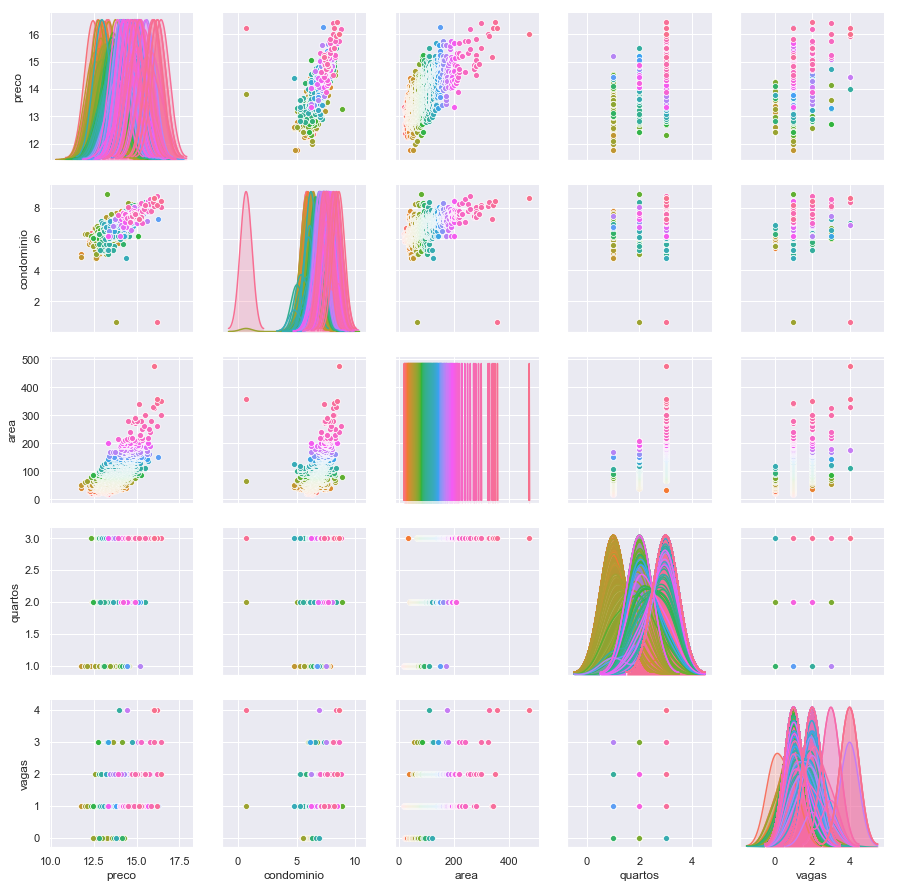

In [84]:
# matplotlib scatterplots
sns.set()
logdata = data.applymap(np.log1p)
# unapply log to the column 'quartos' and 'vagas'
logdata['quartos'] = data['quartos']
logdata['vagas'] = data['vagas']
logdata['area'] = data['area']
cols = ['preco', 'condominio', 'area', 'quartos', 'vagas']

#sns.pairplot(logdata[cols], height = 2.5, hue='area', diag_kws={'bw': 1.0})
g = sns.pairplot(logdata[cols], height = 2.5, hue='area', diag_kws={'bw': 0.5})
g._legend.remove()
plt.show();

###### Matriz de plotagens esparsas, pm2 (log) como referência

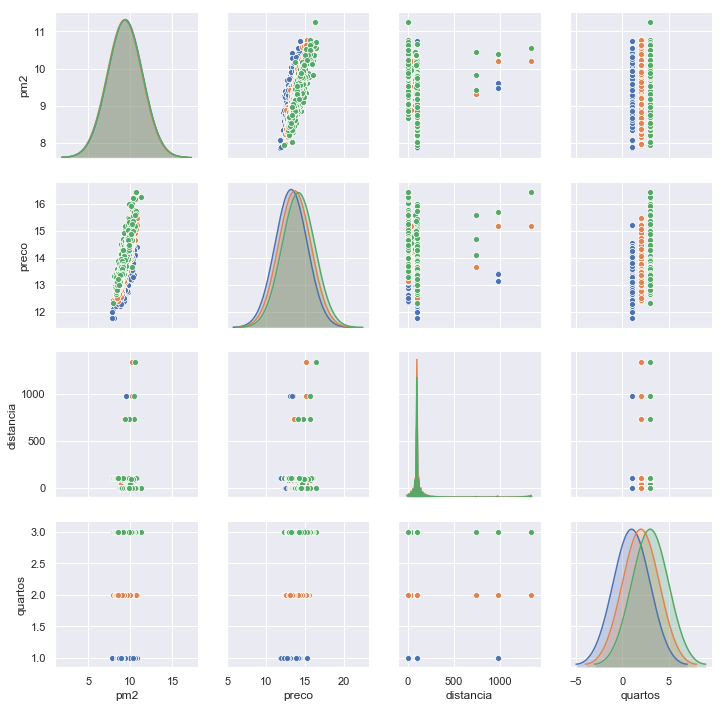

In [85]:
# matplotlib scatterplots
sns.set()
logdata = data.applymap(np.log1p)
# unapply log to the column 'quartos' and 'vagas'
logdata['distancia'] = data['distancia']
logdata['quartos'] = data['quartos']
logdata['vagas'] = data['vagas']
logdata['area'] = data['area']
cols1 = ['pm2', 'preco', 'distancia', 'quartos']
g = sns.pairplot(logdata[cols1], height = 2.5, hue='quartos', diag_kws={'bw': 2.0})
g._legend.remove()
plt.show();

Observando-se o conjunto de scatter plots obtidos desde o início deste estudo, conclui-se que a correlação positiva demonstrada pelas variáveis mais relevantes na "explicação" do preço, apresenta sinais de linearidade e sugere a possibilidade de obtermos sucesso nas predições, partindo de um modelo de regressão linear. 

De outro lado, as plotagens da distância em relação ao preço, embora denotem correlação inversa, não expressam, com tanta nitidez, esta tendência. Há uma razoável concentração de preços altos nas menores distâncias, porém, o fato de termos muitos imóveis localizados em bairros distantes da orla, na amostra, os gráficos apresentam descontinuidades. Precisaríamos aumentar o tamanho da amostra, para que pudéssemos separar os imóveis por bairro - com orla e sem orla - e, desta forma, eliminarmos este "ruído" dos gráficos.

## 9. O modelo

### 9.1.  Ajuste Fino

De acordo com Hair Jr. et al. (Studyguide for Multivariate Data Analysis, 2013), quatro premissas devem ser testadas, quando se trata de análise de dados:
    
**Normalidade** - quando mencionamos normalidade, o que queremos dizer é que é desejável que a distribuição dos dados se aproxime de uma normal. A maioria dos testes estatísticos são concebidos e testados dentro deste pressuposto. Por isto, nossa análise univariada sempre procurou, quando necessário, aplicar transformações nos dados que os normalizassem. É importante lembrar que a normalização univariada não garante a normalidade multivariada (que é o que gostaríamos de ter), mas ajuda. Há que se ter em conta que em grandes amostras, a normalidade não se torna problema. No entanto, ao cuidarmos desta questão, estaremos prevenindo diversas outras anomalias como, por exemplo, a heteroscedacidade. Por esta razão, gastamos tanto tempo entretidos com este tema.

As outras seriam **homoscedasticidade** (homos=igual, cedasticidade=variância), ou seja, manter-se variância uniforme para a variável predita e variáveis independentes. Em terceiro lugar, deve-se testar a **linearidade** que normalmente é examinada a partir de parcelas de dados dispersos, procurando por padrões lineares. Por último, devem ser identificados **erros correlacionados** que são comuns em séries temporariais, pois tendem a se repetir com o passar do tempo.

#### 9.1.1.  Normalidade

A busca da normalidade ajuda no teste das duas primeiras premissas. Tendências de linearidade foram constatadas pelo exame dos gráficos esparsos.  Indícios de erros correlacionados não foram detectados e não faz muito sentido aprofundarmos esta busca, uma vez que não foi detectado nenhum padrão repetitivo, como os que normalmente aparecem na análise de séries temporais, o que näo é o caso.

Portanto, o ajuste final fica ilustrado a seguir, quando utilizamos a transformação $log2(1+x)$ como normalizadora dos dados não categóricos. Os gráficos mostram a probabilidade de ajuste antes e depois da transformação:

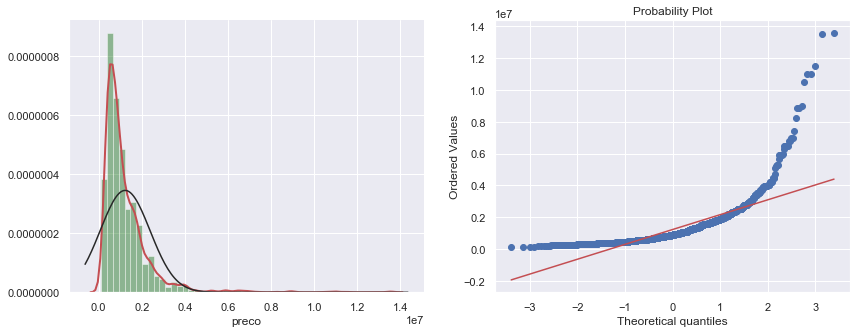

In [86]:
# histogram and normal probability plot
import scipy.stats as stats
from scipy.stats import norm
fig0 = plt.figure(figsize=(14, 5))        
ax2 = plt.subplot(121)  
fig0.add_subplot(ax2)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
field = data['preco']
sns.distplot(field, fit=norm, color='darkgreen', kde_kws={"color": "r", "lw": 2})
# fig = plt.figure()
ax3 = plt.subplot(122) 
fig0.add_subplot(ax3)
res = stats.probplot(field, plot=ax3)
plt.show();

A variável **preco** dos imóveis após a transformação, exibindo um melhor "fit" linear:

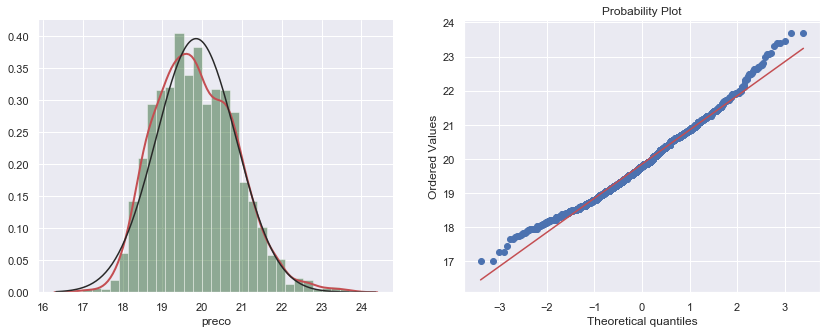

In [87]:
#histogram and normal probability plot
field = np.log2(data['preco'])
import scipy.stats as stats
from scipy.stats import norm
fig0 = plt.figure(figsize=(14, 5))        
ax2 = plt.subplot(121)  
fig0.add_subplot(ax2)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
sns.distplot(field, fit=norm, color='xkcd:darkgreen', kde_kws={"color": "r", "lw": 2})
# fig = plt.figure()
ax3 = plt.subplot(122) 
fig0.add_subplot(ax3)
res = stats.probplot(field, plot=ax3)
plt.show();

#### 9.1.2.  Homoscedasticidade

A melhor maneira de testarmos a homoscedasticidade entre duas variáveis, é examinarmos sua relação graficamente. Vamos rememorar os gráficos bivariados entre **preço** x **area** e **pm2** x **area**, exibidos anteriormente e que possuíam um grau de dispersão cônica maior na base. Após a transformação $log2(1+x)$, os pontos se mostram mais uniformemente dispersos, como podemos observar nos gráficos esparsos a seguir:

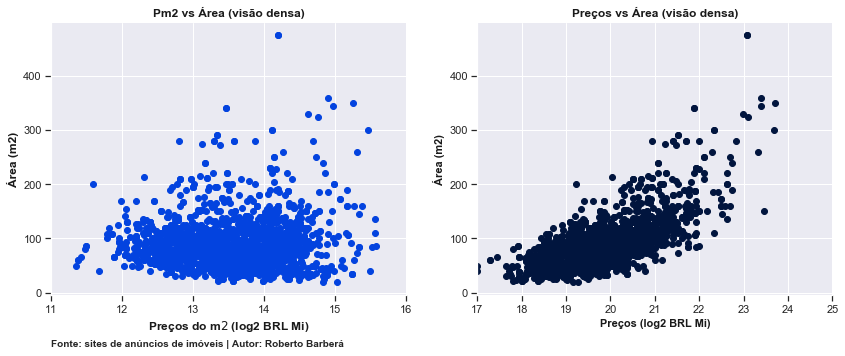

In [90]:
# Bivariated plots
# pm2 x area
xval = data['pm2']
xvalog2 = np.log2(xval)
fig3 = plt.figure(figsize=(14, 5))
ax2 = plt.subplot(121) 
fig3.add_subplot(ax2)
ax2.spines["top"].set_visible(False)  
ax2.spines["right"].set_visible(False)  
ax2.get_xaxis().tick_bottom()  
ax2.get_yaxis().tick_left() 
# Redefine limites dos eixos
plt.xlim(11, 16)
# plt.ylim(0,500)
# cm = plt.cm.get_cmap("Greens")
# cor = cm(np.multiply(xval,1/1))
# Padroes de cores (usadas cores sólidas)
plt.scatter(xvalog2, data.area, facecolor='xkcd:blue')
plt.title (u'Pm2 vs Área (visão densa)', fontsize=12, fontweight='bold', color='k')
plt.ylabel(u'Área (m2)', fontsize=12, fontweight='bold', color='k') 
# ax1.xaxis.set_label_coords(12, -55)
plt.xlabel(u'Preços do m$2$ (log2 BRL Mi)', fontsize=12, fontweight='bold', color='k')
plt.text(11, -100, "Fonte: sites de anúncios de imóveis | Autor: Roberto Barberá", fontsize=10, fontweight='bold')
# preco(log2) x area
xval = data['preco']
xvalog2 = np.log2(xval)
ax1 = plt.subplot(122) 
fig3.add_subplot(ax1)
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.get_xaxis().tick_bottom() 
ax1.get_yaxis().tick_left() 
# Redefine limites dos eixos
plt.xlim(17, 25)
# plt.ylim(0,500)
# cm = plt.cm.get_cmap("Purples")
# cor = cm(np.multiply(xval,1/1))
# Padroes de cores (usadas cores sólidas)
plt.scatter(xvalog2, data.area, facecolor='xkcd:navy')
plt.title (u'Preços vs Área (visão densa)', fontsize=12, fontweight='bold', color='k')
plt.ylabel(u'Área (m2)', fontsize=11, fontweight='bold', color='k') 
# ax1.xaxis.set_label_coords(12, -55)
plt.xlabel(u'Preços (log2 BRL Mi)', fontsize=11, fontweight='bold', color='k')
# plt.text(0, -80, "Fonte: sites de anúncios de imóveis | Autor: Roberto Barberá", fontsize=10, fontweight='bold')
plt.show();

In [91]:
# convert categorical variable into dummy
dataDum = pd.get_dummies(data)

### 9.2.  Dados Faltantes e Valores Atípicos (Pontos Extremos)

#### 9.2.1.  Dados Faltantes

Algumas questões se colocam ao nos depararmos com falta de dados:
Qual a incidência dos dados que faltam para cada variável? Esta ausência é prevalente?
É aleatória, ou segue algum padrão?
A resposta a estas questões é importante por razões práticas. Dados faltantes podem implicar uma redução da amostra, a ponto de prejudicar, ou até de impedir, a evolução da análise.

In [92]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
perc = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, perc], axis=1, keys=['Total', ' Percentuais'])
missing.head(20)

,Total,Percentuais
pm2,0,0.0
distancia,0,0.0
preco,0,0.0
atualizacao,0,0.0
bairro,0,0.0
area,0,0.0
vagas,0,0.0
suites,0,0.0
quartos,0,0.0
condominio,0,0.0


A contagem de dados faltantes, por variável, aparece na tabela acima. Foi feita programaticamente e demosntra que não há dados faltantes em nenhuma das variáveis consideradas.

Costumo considerar uma linha de corte da ordem de 15%, ou seja, variáveis que apresentarem mais do que 15% de dados faltantes são excluídas da análise (e do modelo), sempre que se mostrar inviável qualquer tentativa tecnicamente válida para recuperação desses dados.

#### 9.2.2.  Valores Atípicos (Outliers)

Valores extremos são algo com que devemos nos preocupar, uma vez que podem afetar a convergência dos modelos. Podem demandar tratamento complexo, para que possam ser entendidos e devidamente tratados. Além disto, podem ser uma valiosa fonte reveladora de comportamentos específicos. 

Vamos começar tentando identificar se existem, quem são e qual o intervalo de valores que caracterizaria estas "anomalias":

In [93]:
# standardizing data
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
preco_sc = StandardScaler().fit_transform(data['preco'][:, np.newaxis]) ;
lim_inf = preco_sc[preco_sc[:,0].argsort()][:10]
lim_sup= preco_sc[preco_sc[:,0].argsort()][-10:]
print('Lower limit range of the distribution:');
print(lim_inf);
print('Higher limit range of the distribution:');
print(lim_sup);

Lower limit range of the distribution:
[[-0.95144249]
 [-0.95144249]
 [-0.92634555]
 [-0.92634555]
 [-0.90990272]
 [-0.88653661]
 [-0.88653661]
 [-0.87788249]
 [-0.87442084]
 [-0.87355543]]
Higher limit range of the distribution:
[[ 6.07570115]
 [ 6.6382188 ]
 [ 6.6382188 ]
 [ 6.72475998]
 [ 8.02287764]
 [ 8.45558353]
 [ 8.45558353]
 [ 8.88828942]
 [10.61911298]
 [10.70565416]]


A tabela acima mostra os dez menores e os dez maiores valores assumidos pela variável **preço** (sem transformação log) expressos em milhões de BRL (a valores correntes), depois do uso da função de Standard Scaling (Sklearn lib.), que reescala os valores para apresentarem média $\bar{x} = 0$ e desvio padrão $s = 1$. 

Observa-se que os valores inferiores estão razoavelmente próximos de zero, porém, os superiores, aparecem distantes entre 6 e 10 desvios (thanks to Pedro Marcelino https://www.kaggle.com/pmarcelino code contribution).

Valores atípicos sempre demandam cautela e observação. Sinto-me tentado a eliminá-los, uma vez que se trata de apenas dois exemplares em quase dois mil, com preços acima de dez milhões de BRL. 

Entretanto, a opção pelo modelo preditivo baseado no XGBoost, nos permite manter os valores extremos e observar o que acontece. O XGBoost, pela própria arquitetura, foi construído para ser resiliente à presença de valores extremos e de valores faltantes, na amostra.

#### 9.2.2.  Tratamento de Variáveis Categóricas (Dummy Variables, ou Variáveis Mortas)

As variáveis categóricas, embora possuam valores numéricos, devem ser marcadas para que não sejam envolvidas nas iterações do modelo, por se tratar, apenas, de rótulos de agrupamento. Nesta versão, apenas as variáveis **bairro** e **quartos** estariam neste grupo. Posteriormente, a variável **CEP** será introduzida. Porém, ao torná-las dados de entrada do modelo preditivo, elas ficam automaticamente neutralizadas no modelo, uma vez que todo o conjunto de treinamento envolvido na predição do preço, será composto de imóveis de mesmo bairro e mesmo número de quartos (e mesmo CEP, futuramente). Elas deixam de ser variáveis e passam a ser constantes, para a predição.

Portanto, não há a necessidade de convertê-las de categóricas para mortas. Uma forma fácil de se fazer isto, seria usarmos a seguinte linha de código Python:  *data_set=pd.get_dummies(data_set)*

### 9.3. O Modelo de Regressão Escolhido

#### 9.3.1.  XGBoost - Uma imagem diz mais do que mil palavras

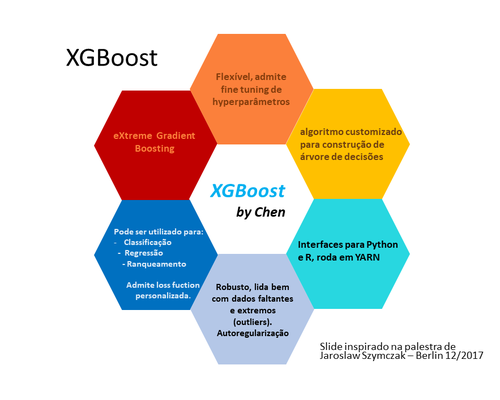

In [122]:
from PIL import Image
pil_im = Image.open('xgboost_peq.png', 'r')
display(pil_im)

'''
new_width  = 500
new_height = 400
pil_im =pil_im.resize((new_width, new_height), Image.ANTIALIAS)
display(pil_im)
pil_im.save('xgboost_peq.png') # format may what you want *.png, *jpg, *.gif
''';

#### 9.3.2.  Parâmetros do XGBoost Regressor

O XGBoost Regressor oferece uma série de parâmetros ajustáveis, chamados hiperparâmetros, com alguns valores default pré configurados. Entretanto, para melhores resultados, estes parâmetros devem ser ajustados de modo a melhorarmos a resposta do modelo. A lista de valores default pode ser obtida por meio do seguinte fragmento de código Python:

In [102]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.__dict__

{'max_depth': 3,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'silent': True,
 'objective': 'reg:linear',
 'booster': 'gbtree',
 'gamma': 0,
 'min_child_weight': 1,
 'max_delta_step': 0,
 'subsample': 1,
 'colsample_bytree': 1,
 'colsample_bylevel': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'base_score': 0.5,
 'missing': nan,
 'kwargs': {},
 '_Booster': None,
 'seed': None,
 'random_state': 0,
 'nthread': None,
 'n_jobs': 1}

O significado de cada um deles é o seguinte:

- **max_depth**: se estiver configurado, quão profunda é a árvore usada ou, quantas iterações você permitirá que seu modelo realize, expandindo a árvore. Se max_depth = 5, por exemplo, significa que seu modelo poderá produzir interações com até 5 variáveis simultaneamente, a cada iteração). Lembrar que a cada nível de profundidade, o número de "folhas" da árvore dobra. Isto significa que dobra a complexidade do algoritmo e pode dobrar o tempo de execução. A regularização automática do XGBoost tende a nos proteger disto, mas é bom manter-se sempre preparado para as coisas eventualmente dobrarem de tamanho.

- **learning_rate**: é o parâmetro que regula a velocidade de aprendizado (shrinkage) do modelo. No caso do gradiente descendente, o learning rate evita ficarmos pulando de um pico para outro, durante o caminho de minimização do erro, em direção 'a convergência do modelo.

- **max_delta_step** (raramente usado): é uma espécie de peso adicional aplicado ao learning_rate, necessário apenas nos casos em que haja grande desbalanceamento na amostras (ou classes da amostra). Se precisar dele, os valores sugeridos variam entre 1 e 10. Do contrário, não toque neste parâmetro (Jaroslaw Szymczak, video - Berlin 12/2017, https://www.youtube.com/watch?v=s3VmuVPfu0s .

- **n_estimators**: é basicamente o número de iterações (boosting rounds) previstas.

- **booster**: o XGBbooster não precisa ser sempre usado com árvores. Porém, na maioria das vezes o será. 

- **scale_pos_weight**: usado em modelos de classificação binária (não é o caso aqui) para rebalancear pesos entre ocorrências positivas e negativas, de exemplares na amostra.

- **base_score**: o processo de classificação do booster começa predizendo uma probabilidade = 0.5  para todas as observações. Você pode mudar isto alterando este parâmetro. Não é o nosso caso, pois estaremos usando um modelo de regressão e não um de classificação.

- **seed / random_state**: semente para randomizar exemplos, de modo a facilitar a reprodução de resultados do XGBoost. Nem sempre funciona de forma pefeita, principalmente se o XGBoost estiver sendo usado em multithreads em vários processadores, pois as operações de ponto flutuante são suscetíveis a diferenças de arredondamento.

- **missing**: tratar dados faltantes não convencionais (que não sejam numpy.nan).

- **objective**: você pode customizar a função objetivo do XGBoost. Basta usar a chamada que mapeia objective (y_true, y_pred) -> grad, hes) com algo que seja diferenciável até segunda ordem. Isto pode tornar lento o booster. 


- Random Subsample Parameters (se parece com Random Forrest)
    - subsample: taxa de subexemplares de uma instância de treinamento (training instance). O XGBoost trata valores atípicos carregando frações da árvore, a cada iteração (round), prevenindo que estes valores permaneçam na árvore.
    - colsample_by_tree - cada ramo da árvore criada terá apenas uma porção das variáveis independentes.
    - colsample by level - cada ramo da árvore terá todos as variáveis independentes, porém com apenas uma parte da profundidade.
    

- Regularization Parameters (parâmetros de regularização)
    - reg_alpha (fator de regularização L1, fator de normalização L1).
    - reg_lambda (fator de regularização L2, fator de normalização L2).
    - gamma ("fator de regularização L0" - depende e influencia o número de "folhas" da árvore).
    - min_child_weight -  para modelos de regressão é simplesmente o número de exemplares da amostra.    
    
Nota: infelizmente, por uma restrição contratual, não poderemos divulgar os valores utilizados nos hiperparämetros e nem o programa fonte completo, contendo a implementação do modelo. Mas, uma amostra dos resultados alcançados será mostrada logo a seguir.

#### 9.3.3.  Resultados

O modelo preditivo funciona de forma iterativa, até que a função de gradiente descendente atinja seu menor valor, sem mais decrescer (overfitting). A cada iteração é apurada a medida do RMSE (Root Mean Square Error), ou erro médio quadrático. Quando esta medida pára de decrescer, o algoritmo suspende as iterações e apura o erro médio absoluto, ou MAE (Mean Absolute Error), entre cada valor predito e seu valor real correspondente. A boa técnica estabelece que os valores de teste (valores reais, ou "conjunto de teste") devem ser sempre valores que nunca fizeram parte do "conjunto de treinamento" do modelo. 

O modelo é, então, parametrizado para que esta interrupção ocorra automaticamente, poupando recursos computacionais e tempo de processamento. Para amostras muito grandes (big data) esta possibilidade traz grande impacto no custo de homens-hora, custo de processamento e tempo de processamento, se comparado a outros modelos não baseados no XGBoost.

As predições são produzidas fornecendo-se o bairro e o tipo de apartamento cujo preço do m<sup>2</sup> se deseja estimar. O sistema utiliza um pequeno formulário para entrada, para informação destes dados.

Os resultados são calculados e fornecidos rapidamente, em tempo real, e são sempre de dois tipos, a saber:

- **Predição do Valor Médio do m<sup>2</sup>**:  consiste na média das predições calculadas para o preço do m<sup>2</sup> dos exemplares da amostra; e

- **Predição do Valor Instantâneo do m<sup>2</sup>**:  consiste na predição de menor MAE (mean absolute error).

A título de ilustração, as fórmulas do RMSE e do MAE usadas no modelo são as seguintes:

Root Mean Square Error (RMSE) = $\sqrt{\displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2}$

Mean absolute error (MAE) = $\displaystyle\frac{1}{n}\sum_{t=1}^{n}|e_t|^2$

É apresentada, a seguir, uma grade de resultados contendo os dados das predições solicitadas, uma em cada linha. Esta grade é gravada em disco no formato CSV, facilmente importável pelo Excel ou similar. 

In [103]:
# dfpred = pd.read_csv("../input/model-samples-entry-file/pred_saida.csv", delimiter=";", encoding="cp1252")
dfpred = pd.read_csv("pred_saida.csv", delimiter=";", encoding="cp1252")
display(dfpred.head())

,Bairro,Tipo,Valor Real Medio,Valor Predito Medio(PM2),Erro Medio Absoluto,Valor Real Instantaneo,Valor Predito Instantaneo(PM2),Data
0,ipanema,2q,20672.78,20642.54,1.20,16050.40,16050.40,2017-12-01
1,ipanema,3q,17559.13,19349.38,1.18,17182.82,17182.82,2017-12-01


Além da grade de predições, o sistema ecoa, na tela, a cada predição, quatro gráficos:
    
- o primeiro informa quais **variáveis principais** da predição efetuada, na forma de histograma horizontal (matizes de cinza);
- o segundo mostra o aspecto da **distribuição do preço do m<sup>2</sup> sem transformação log**; 
- o terceiro mostra a mesma distribuição do preço do m<sup>2</sup>, só que **com transformação log**; e

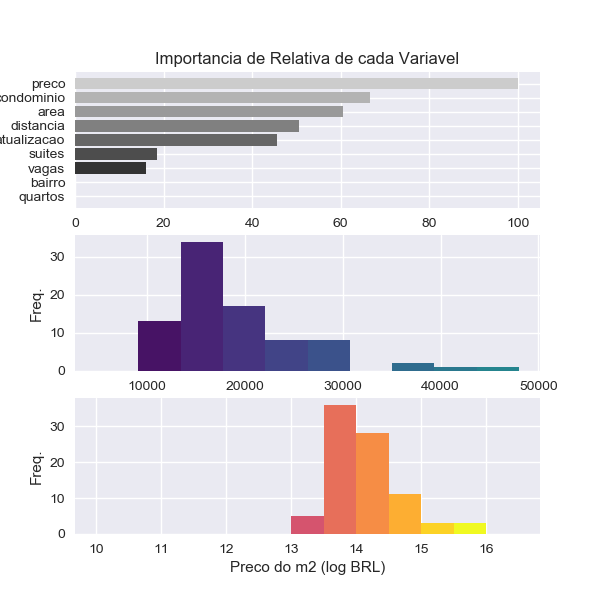

In [133]:
princ_feat = Image.open('princ_feat.png', 'r')
display(princ_feat)

- o quarto e último, mostra o aspecto da **curva de aprendizado do modelo**.

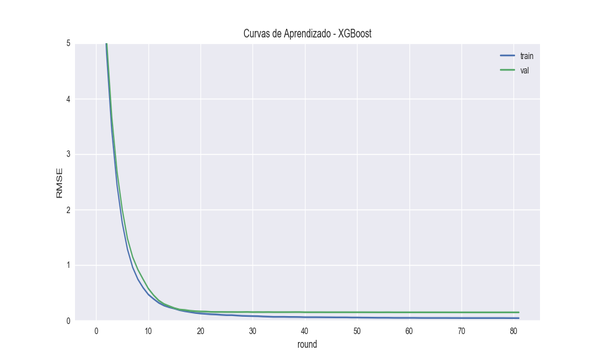

In [136]:
learn_curve = Image.open('learn_plot_peq.png', 'r')
display(learn_curve)

## 10. Conclusão

Sistemas que aprendem com os próprios dados (MLS - machine learning systems) estiveram presentes em quase todos os tipos de negócios, em 2017.  Sistemas de credit scoring,  detecção e prevenção de fraudes,  ranqueamento, sistemas de recomendações, de reconhecimento de imagens e de visão digital, foram os campeões de audiência. Muitos mais estão por vir, já em 2018.

Afirmo, sem medo de errar, que os sistemas baseados em inteligência artificial causarão transformações em nossas vidas, semelhantes às que a máquina a vapor, ou a eletricidade, causaram no passado. As habilidades e conhecimentos requeridos e necessários à formação de profissionais de tecnologia, transformarão o mercado de trabalho e o modo como os jóvens escolherão suas carreiras. 

Porém, nem tudo é progresso. Empregos estão sendo extintos e novos postos de trabalho estão sendo criados, mas não de forma organizada, ou sincronizada. Aqueles que forem substituídos, dificilmente conseguirão manter suas carreiras. Há, portanto, que se pensar em políticas públicas compensatórias e na questão da igualdade de oportunidades.

Mas isto nada tem a ver com esta grande bobagem que é a narrativa "Trump", que  demoniza a globalização e faz apologia da "localização" das economias. O mercado é soberano e vai ficando cada vez mais difícil manter-se  fronteiras nacionais, numa economia em que as empresas interagem diretamente e de forma cada vez mais globalizada, sem intermediários. 

A realidade nua e crua é que mudanças estão ocorrendo no mundo desenvolvido, de forma extremamente rápida e lideradas pelo Vale do Silício. E nós, aqui no Brasil perplexos, diante de um Estado desmoralizado, inoperante e que assim poderá permanecer por, pelo menos, uma década.

Para o próprio bem das empresas brasileiras, passa a ser fundamental que auxiliem no processo de formação educacional e profissional da população, sob pena de não haver pessoal minimamente qualificado, para atendimento da demanda por novas habilidades profissionais. Em, no máximo, dois anos, estaremos "caçando" programadores, cientistas de dados e ensaístas estatísticos ("testers"). 

Tudo leva a crer que estamos à beira de uma nova onda de crescimento mundial, a que o mercado brasileiro terá que responder em futuro muito próximo, quer seja para cumprir exigências de competitividade, quer seja para satisfazer aos interesses de investidores internacionais. E não temos, sequer, uma fração dos profissionais de que precisaremos. 

Não se trata, portanto, apenas de uma questão de eficiência e lucro.  A sobrevivência das empresas brasileiras me parece ameaçada, num cenário em que o conhecimento permitirá fazer muito mais, com menos.

Será muito triste, continuarmos a assistir empresas nacionais fechando as portas, ou tendo que preencher posições de trabalho com profissionais estrangeiros, a exemplo do que ocorreu no Brasil em 2013. Nesta época, logo após o "boom" do Setor de Construção Civil, tínhamos um razoável contingente de engenheiros civis, mas que, na realidade, mostrou-se insuficiente para atender à demanda.

Temos que sair do transe em que nos encontramos, para passarmos a estimular o compartilhamento do conhecimento, possibilitar condições para que o ensino à distância possa ocorrer de forma complementar aos cursos formais e a fomentar a qualificação de professores de programação para as escolas, desde o primeiro grau. É fundamental o engajamento da Sociedade Civil, pois nosso governo já ajudará muito, se não atrapalhar.

O processo de "higienização" do Estado Brasileiro caminha a passos de tartaruga. Levará tempo, até que recursos internacionais comecem a fluir,  de modo a impactarem as taxas de desemprego, que correm sério risco de serem mantidas nos patamares atuais, pelos motivos mencionados.

Torço fervorosamente, para que a classe governante que espero, seja em boa parte renovada no pleito de 2018, não atrapalhe criando restrições ao uso da internet, insumo fundamental para que a educação não formal, possa deslanchar, na velocidade e intensidade necessárias. Rogo a Deus, para que nossos políticos eleitos tenham um mínimo de espírito público e de juízo. 

Entretanto acredito, sinceramente, que apenas torcer e rezar não me parecem atitudes adequadas e nem suficientes, para evitarmos o alongamento desta tragédia brasileira, resultado do completo descaso por parte das autoridades constituídas e do colapso dos serviços públicos básicos.

Crises são sofridas, desesperadoras para muitos, mas pedagógicas.

Portanto, em 2018, que soem alto os arautos das urnas...

## 11. Reconhecimento e Agradecimentos

Agradeço às pessoas, a seguir, pelo desprendimento e generosidade com que compartilham seu conhecimento, algo tão dispendioso e difícil de conquistar. Vocês me encorajaram e inspiraram a produzir esta pequena contribuição:

. Professor Andrew NG - Stanford University and Coursera Co-founder (http://www.andrewng.org/) - gostaria de ter sido um aluno melhor...

. Pedro Marcelino - Comprehensive Data Exploration w/ Python (Kaggle Kernels) https://www.kaggle.com/pmarcelino - Pedro, seu trabalho me inspirou...

. Jason Brownlee,
https://machinelearningmastery.com/author/jasonb/ - Jason, obrigado pela montanha de ótimos artigos que facilitaram, sobremaneira, os testes e implementações aqui usados...

. A Jaroslaw Szymczak (video - Berlin 12/2017)
https://www.youtube.com/watch?v=s3VmuVPfu0s - pelo vídeo suscinto e, ao mesmo tempo, profundo e preciso.

Nossa pequena Terra será, certamente, um lugar menos injusto para se viver, por causa de vocês...

## 12. Bibliografia 

Chen,Tianqi & Guestrin, Carlos - XGBoost: A Scalable Tree Boosting System (Washington University)
https://arxiv.org/pdf/1603.02754.pdf

NG, Andrew - Stanford University CS229 Syllabus and Course Schedule (several pdfs) 
http://cs229.stanford.edu/syllabus.html

Hair, Joseph et al. - Análise Multivariada de Dados (pt-Br Edition)
(https://www.amazon.com.br/An%C3%A1lise-Multivariada-Dados-Joseph-Hair/dp/857780402X/ref=sr_1_1?s=books&ie=UTF8&qid=1516652026&sr=1-1&keywords=joseph+hair+portuguese

Brownlee, Jason - Discover XGBoost With Python!  
(https://machinelearning.samcart.com/products/xgboost-with-python)

Johansson, Robert - Numerical Python a Practical Techniques Approach - 2015
https://www.amazon.com/Numerical-Python-Practical-Techniques-Approach/dp/1484205545

Lehman, Leighton and Meyers - Mathematics for Computer Science (MIT)
https://courses.csail.mit.edu/6.042/spring17/mcs.pdf

Hastie, Tibshirani and Friedman - Elements of Statistical Learning Stanford_ESLII
https://web.stanford.edu/~hastie/Papers/ESLII.pdf